In [4]:
import requests
import pandas as pd
from pathlib import Path
from investment_tools.fmp import FinancialData, ManualAnalysis, Company
from matplotlib import pyplot as plt
import datetime as dt
import yfinance as yf
from pandas_datareader import data as pdr
from IPython.display import clear_output

key_path = Path().home()/'desktop'/'FinancialModellingPrep_API.txt'
with open(key_path) as file:
    api_key = file.read()
    

yf.pdr_override()

Checking matching frame indecies
Financial statement lengths are BS: 13, IS:13, CFS:13, Ratios:11
Financial statement lengths are now each: 11
[*********************100%***********************]  1 of 1 completed
Path already exists. Overwriting saved data.
There were 3/11 values in ebitdaratio that exceed the 0.05 error tolerance.
There were 0/11 values in grossProfitRatio that exceed the 0.05 error tolerance.
There were 0/11 values in operatingIncomeRatio that exceed the 0.05 error tolerance.
There were 5/11 values in incomeBeforeTaxRatio that exceed the 0.05 error tolerance.
There were 5/11 values in netIncomeRatio that exceed the 0.05 error tolerance.
There were 0/11 values in eps that exceed the 0.05 error tolerance.
There were 3/11 values in ebitdaratio that exceed the 0.05 error tolerance.
There were 0/11 values in grossProfitRatio that exceed the 0.05 error tolerance.
There were 0/11 values in operatingIncomeRatio that exceed the 0.05 error tolerance.
There were 5/11 values in i

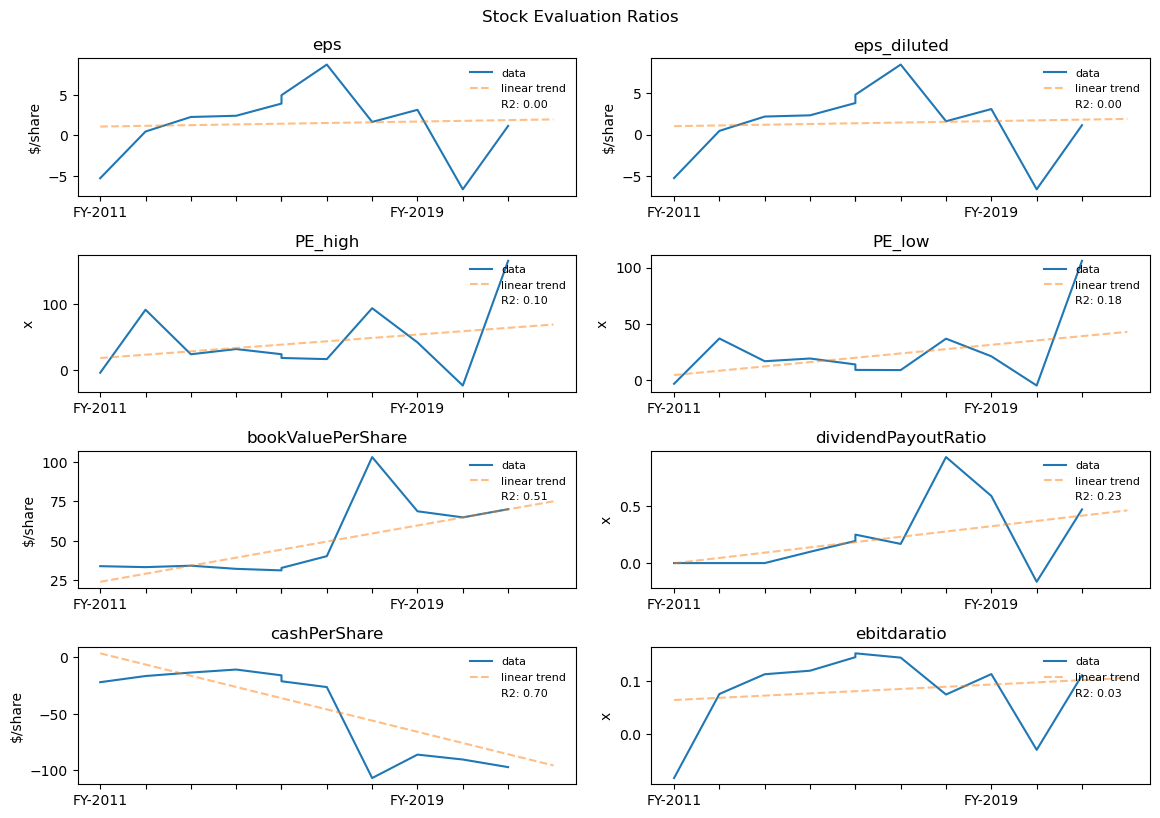

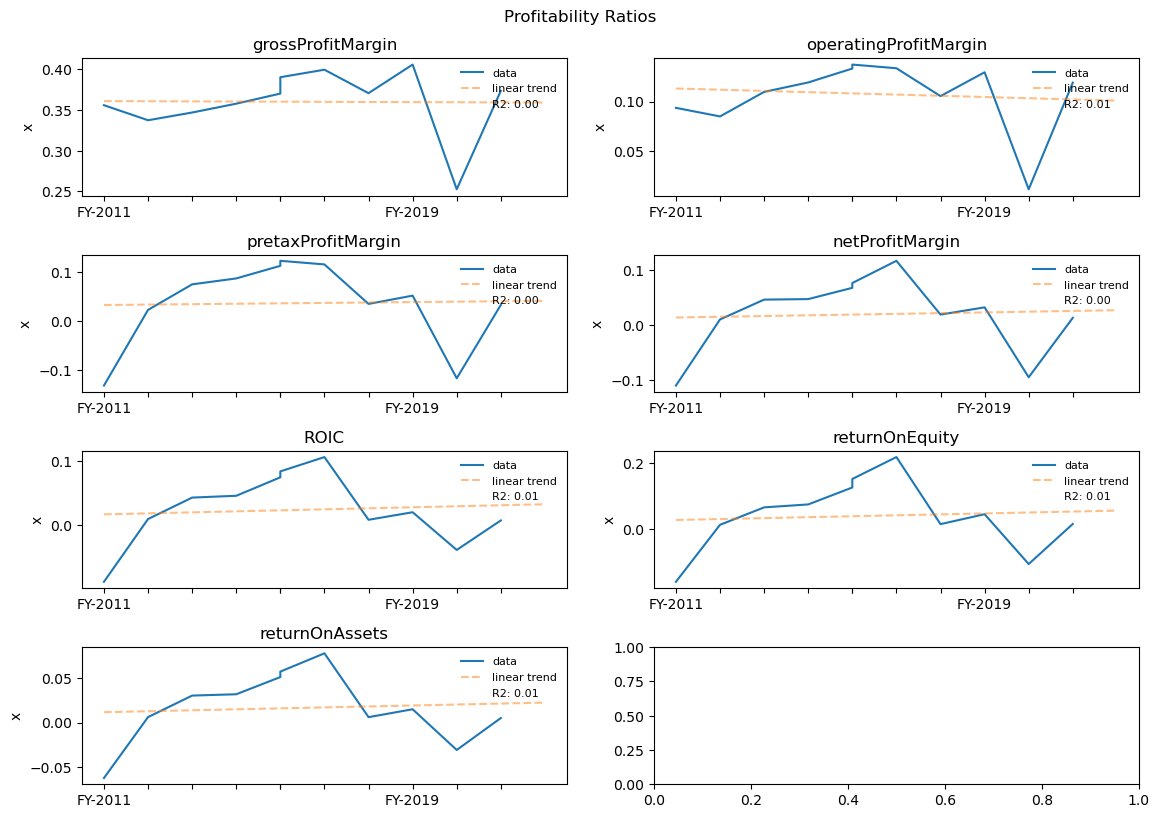

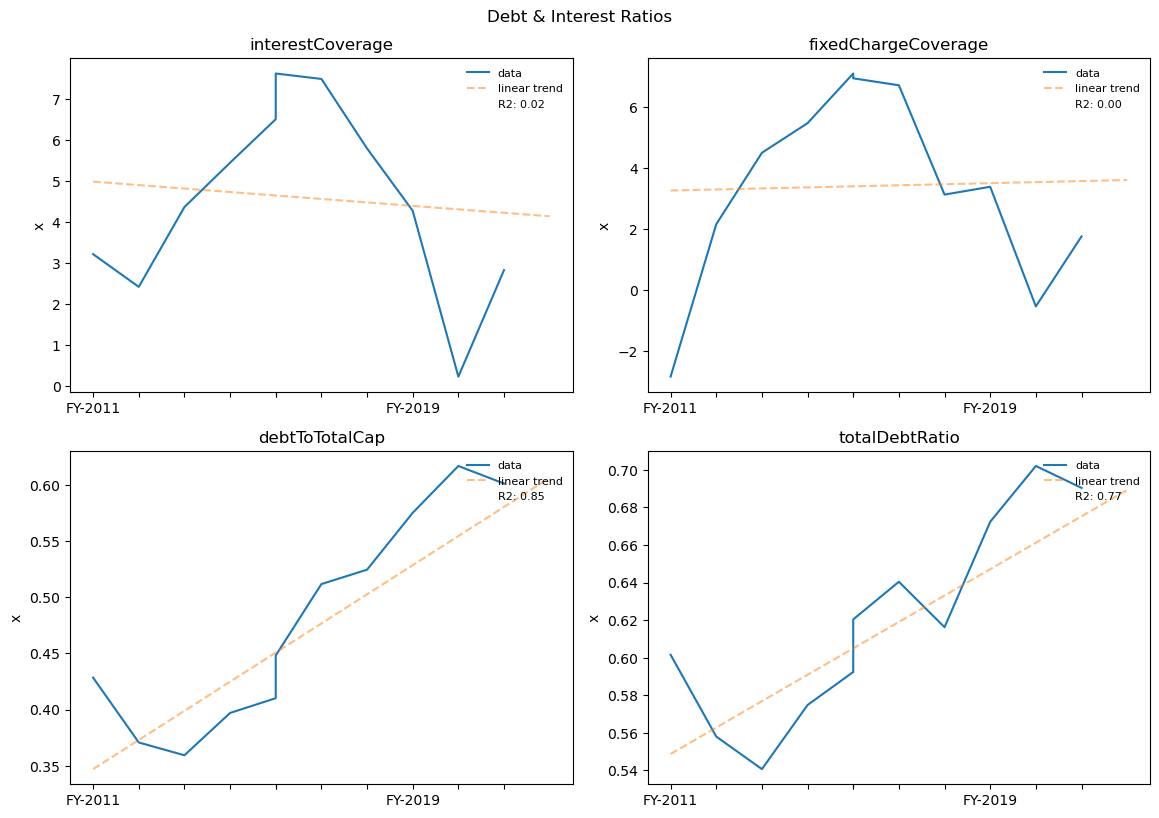

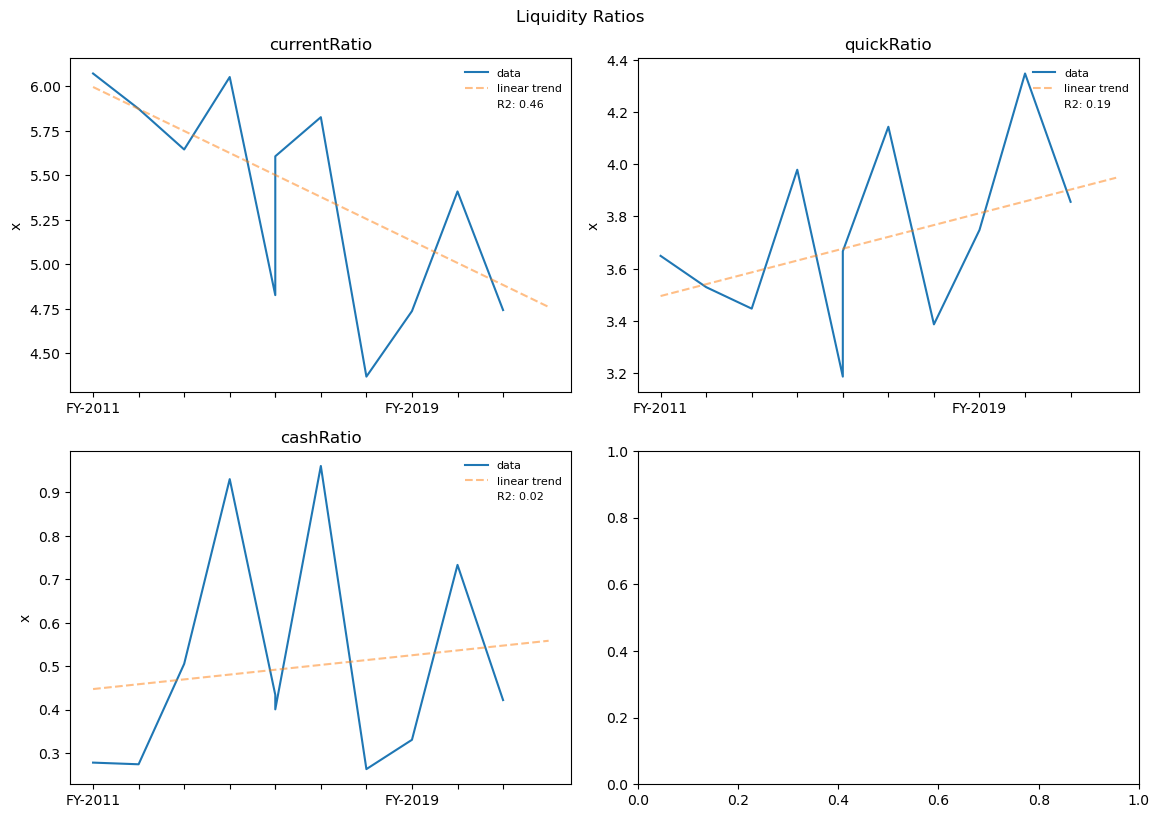

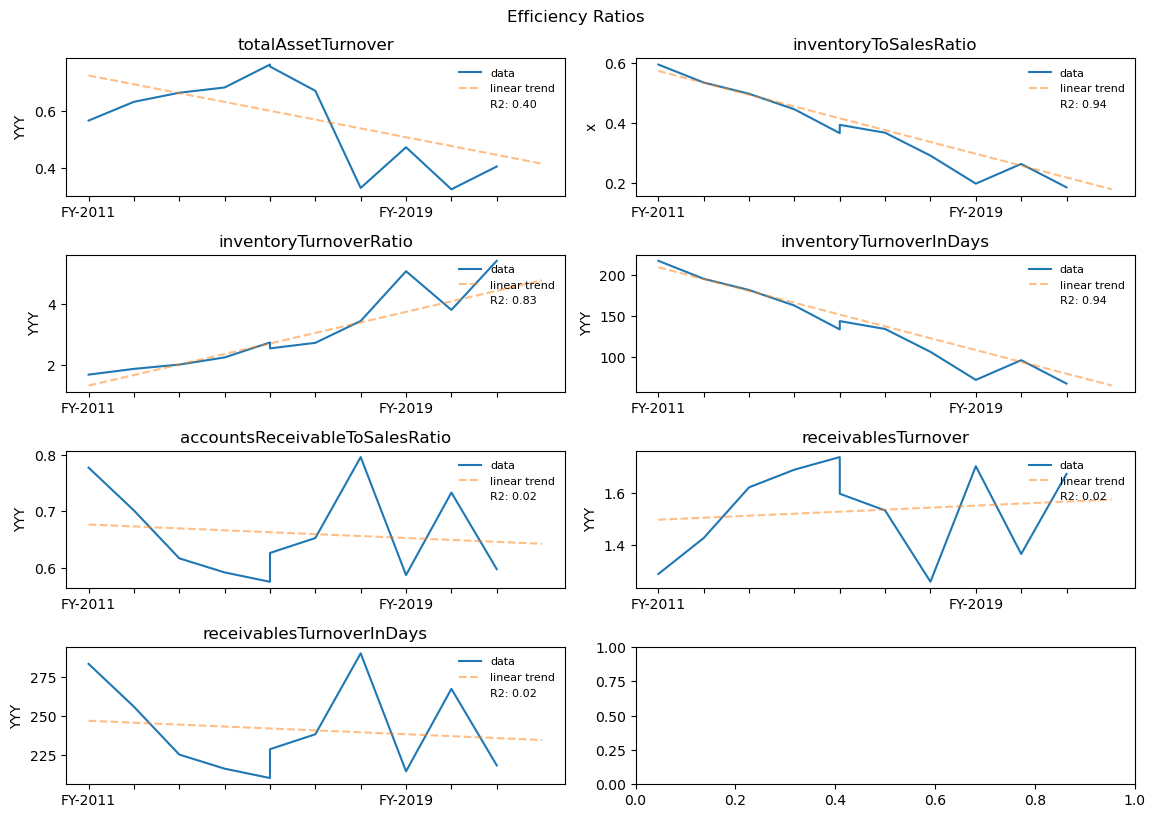

In [5]:
a = Company('VAC', api_key=api_key, period='annual', data='online', limit=120,
           verbose=True)
#ZTS 

In [4]:
a._financial_data.stock_price_data.index

RangeIndex(start=0, stop=34, step=1)

In [3]:
a.scores

{'eps_growth': {'score': 4, 'strength': 0},
 'returnOnEquity_growth': {'score': 4, 'strength': 0},
 'ROIC_growth': {'score': 4, 'strength': 0},
 'returnOnAssets_growth': {'score': 4, 'strength': 0},
 'debtToTotalCap_growth': {'score': 4, 'strength': 0},
 'totalDebtRatio_growth': {'score': 4, 'strength': 0}}

In [5]:
a.metrics['eps_growth']

index
BHP-FY-2003   NaN
BHP-FY-2004   NaN
BHP-FY-2005   NaN
BHP-FY-2006   NaN
BHP-FY-2007   NaN
BHP-FY-2008   NaN
BHP-FY-2009   NaN
BHP-FY-2010   NaN
BHP-FY-2011   NaN
BHP-FY-2012   NaN
BHP-FY-2013   NaN
BHP-FY-2014   NaN
BHP-FY-2015   NaN
BHP-FY-2016   NaN
BHP-FY-2017   NaN
BHP-FY-2018   NaN
BHP-FY-2019   NaN
BHP-FY-2020   NaN
BHP-FY-2021   NaN
BHP-FY-2022   NaN
Name: eps_growth, dtype: float64

In [7]:
a.mea']

index
BHP-FY-2003     0.500
BHP-FY-2004     0.880
BHP-FY-2005     2.080
BHP-FY-2006     3.464
BHP-FY-2007     4.590
BHP-FY-2008     5.506
BHP-FY-2009     2.112
BHP-FY-2010     4.572
BHP-FY-2011     8.582
BHP-FY-2012     5.792
BHP-FY-2013     4.088
BHP-FY-2014     5.200
BHP-FY-2015     0.718
BHP-FY-2016    -2.400
BHP-FY-2017     2.214
BHP-FY-2018     1.392
BHP-FY-2019     3.206
BHP-FY-2020     3.146
BHP-FY-2021     4.470
BHP-FY-2022    12.212
Name: eps, dtype: float64

In [4]:
def tradable_tickers():
    url = f'https://financialmodelingprep.com/api/v3/available-traded/list?apikey={api_key}'
    data = requests.get(url)
    data = sort_json_ticker_data(data.json())
    return data

def sort_json_ticker_data(data):
    return_dict = dict()
    for dct in data:
        if dct['exchange'] not in return_dict.keys():
            return_dict[dct['exchange']] = [dct['symbol']]
        else:
            return_dict[dct['exchange']].append(dct['symbol'])

    return return_dict

ticker_list = tradable_tickers()

In [5]:
ticker_list.keys()

dict_keys(['Swiss Exchange', 'London Stock Exchange', 'Frankfurt', 'New York Stock Exchange', 'Amsterdam', 'XETRA', 'NASDAQ Global Select', 'Australian Securities Exchange', 'HKSE', 'Tokyo', 'Other OTC', 'Taiwan', 'Stuttgart', 'Nasdaq', 'Taipei Exchange', 'Jakarta Stock Exchange', 'American Stock Exchange', 'Athens', 'Milan', 'Warsaw Stock Exchange', 'NASDAQ Capital Market', 'Saudi', 'Madrid Stock Exchange', 'National Stock Exchange of India', 'Canadian Sec', 'Qatar', 'Shenzhen', 'Toronto Stock Exchange', 'TSXV', 'New York Stock Exchange Arca', 'BATS', 'Tel Aviv', 'Helsinki', 'NASDAQ Global Market', 'Stockholm Stock Exchange', 'Copenhagen', 'Istanbul Stock Exchange', 'Paris', 'NZSE', 'São Paulo', 'Santiago', 'Johannesburg', 'Budapest', 'KSE', 'Oslo Stock Exchange', 'Thailand', 'Lisbon', 'Brussels', 'YHD', 'Shanghai', 'SES', 'Mexico', 'Kuala Lumpur', '', 'Dubai', 'Munich', 'NEO', 'KOSDAQ', 'IOB', 'Iceland', 'Berlin', 'Vienna', 'BSE', 'Irish', 'Nasdaq Capital Market', 'Aquis AQSE', 'FTSE

In [9]:
ticker_scan = (ticker_list['New York Stock Exchange'][400:500])

Ticker PEB-PF
Checking matching frame indecies
Financial statement lengths are BS: 3, IS:3, CFS:3, Ratios:2
Financial statement lengths are now each: 2
[*********************100%***********************]  1 of 1 completed


C:\Users\John\Desktop\Git\investment-tools\investment_tools\fmp\fmp_layer_1.py:630: RuntimeWarning: invalid value encountered in double_scalars
  col_data.append((series[i]-series[i-span])/abs(series[i-span]))
C:\Users\John\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
C:\Users\John\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:184: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\John\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:187: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


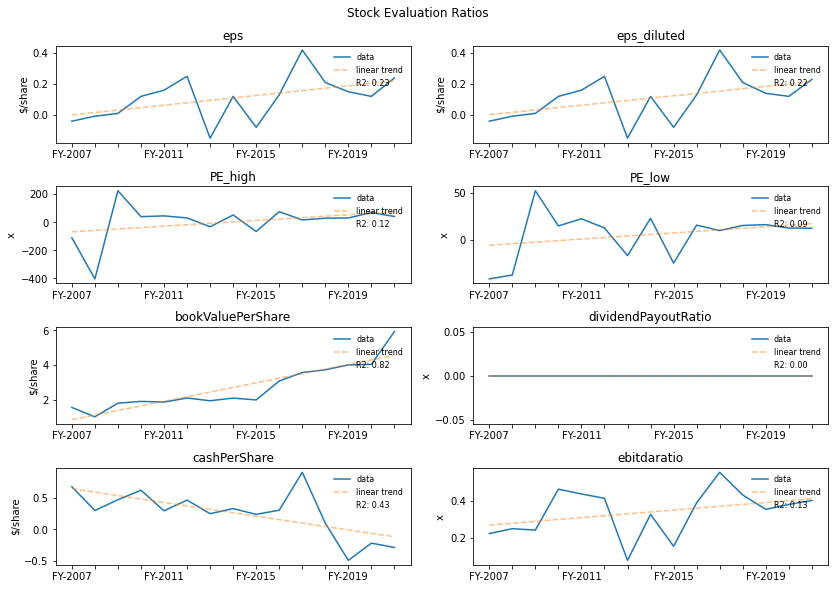

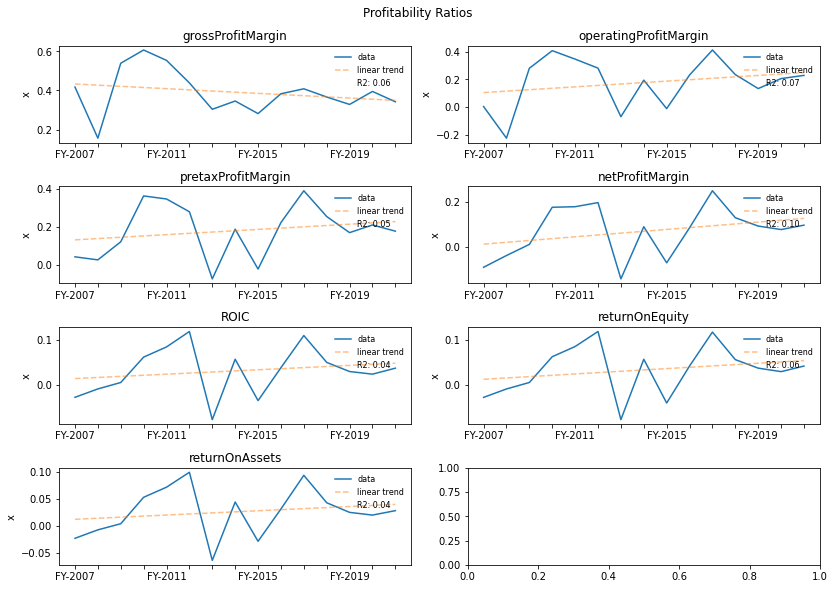

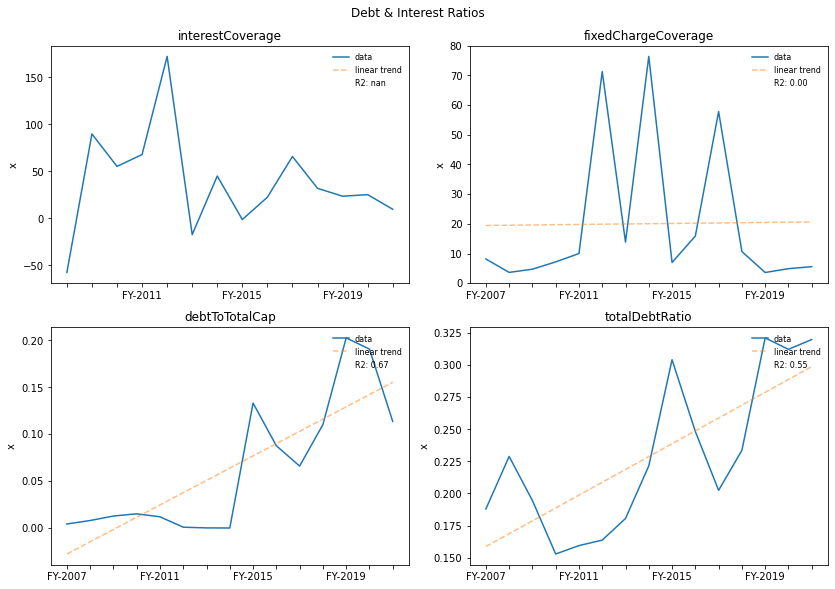

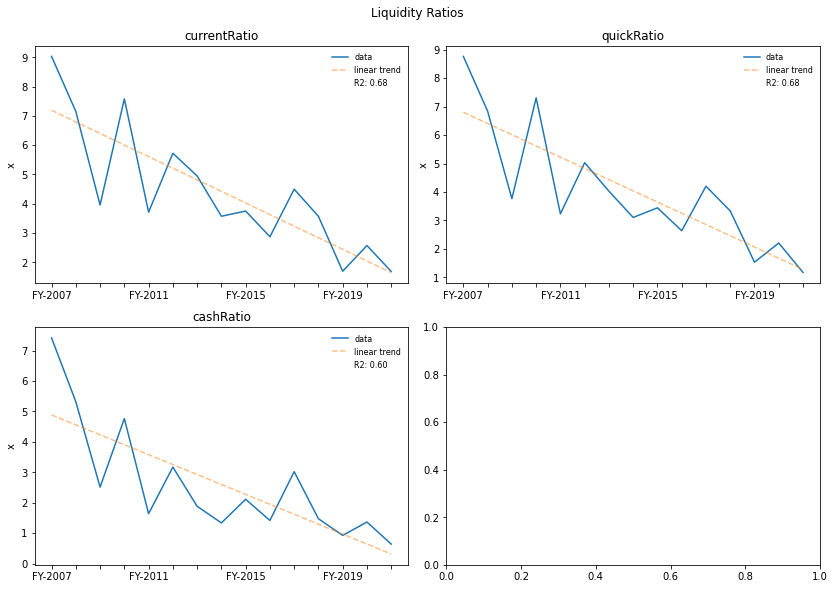

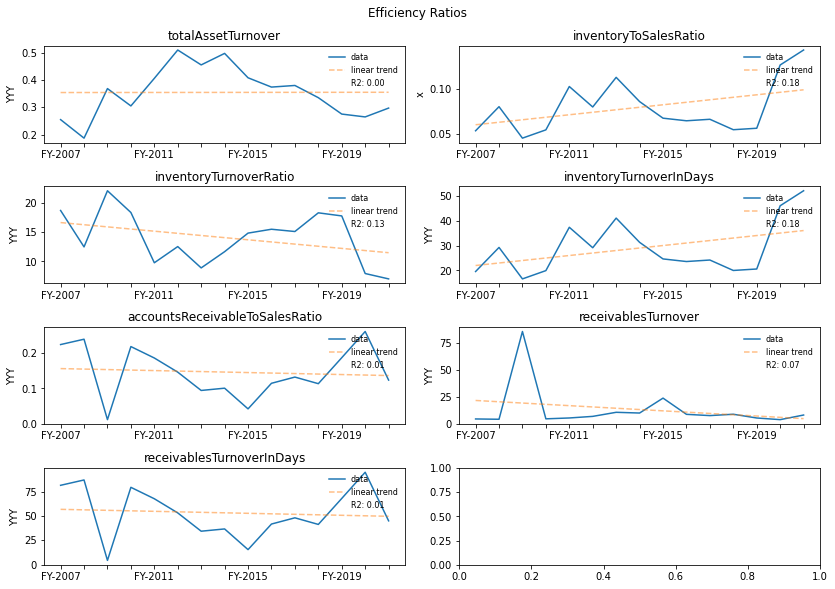

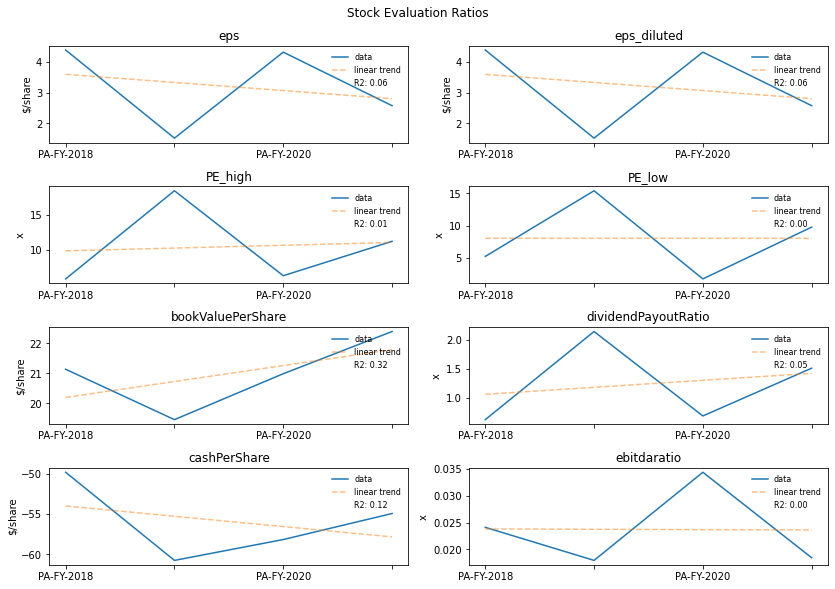

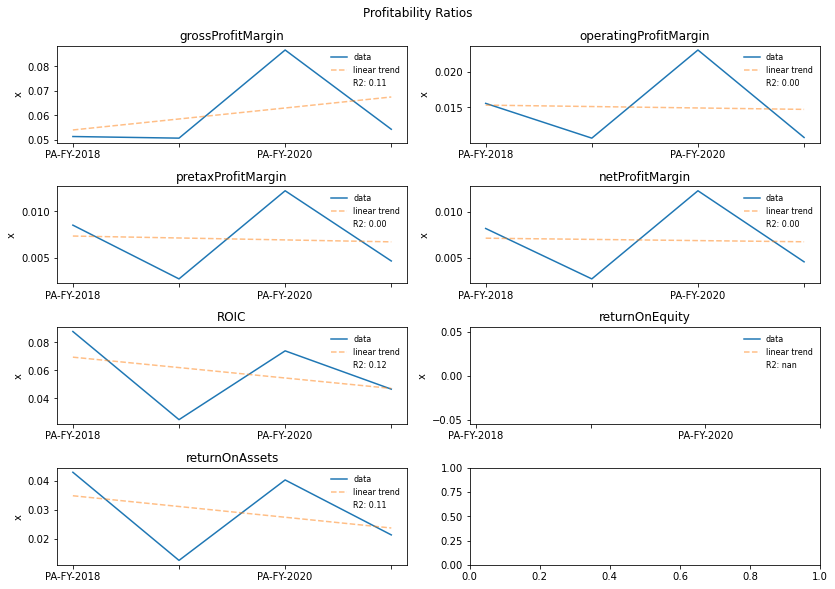

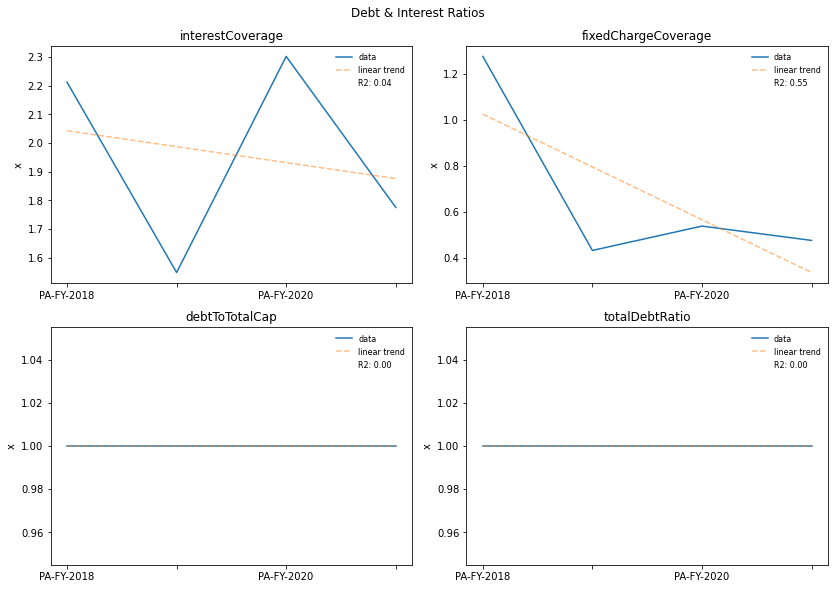

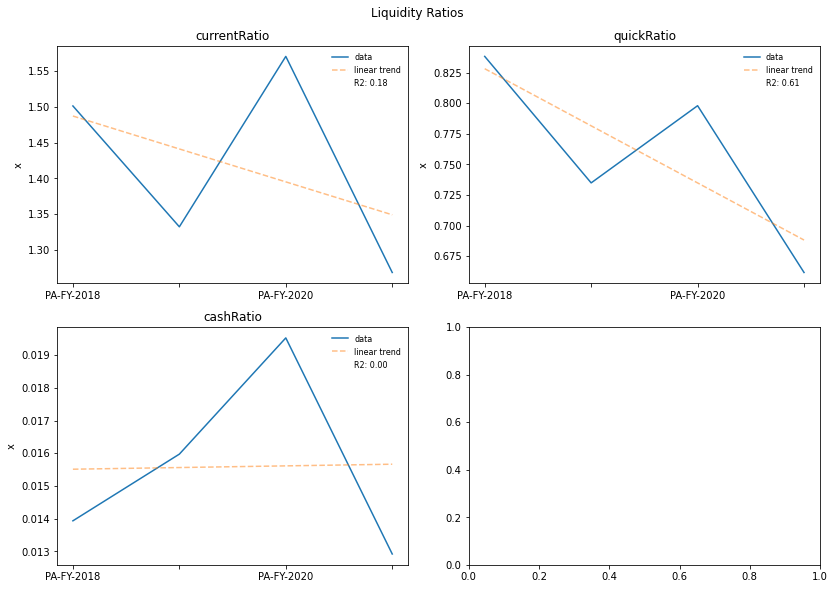

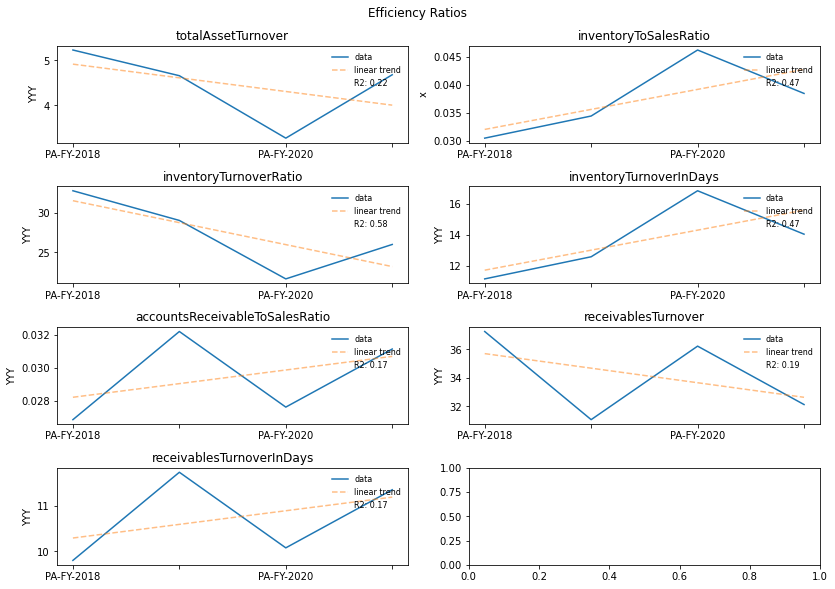

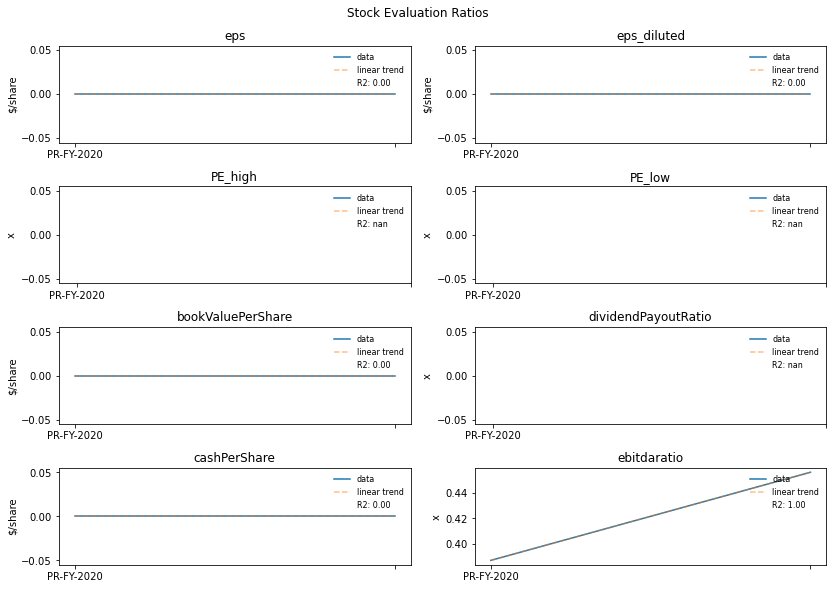

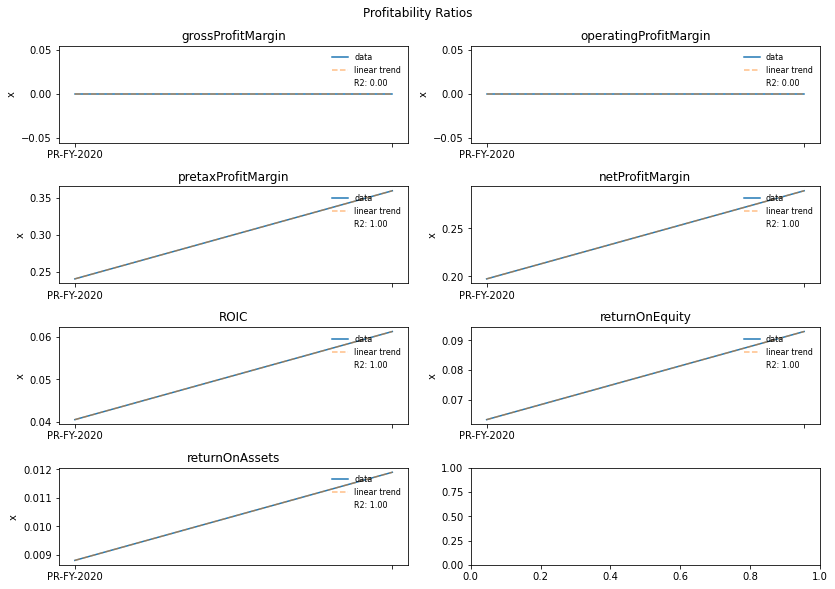

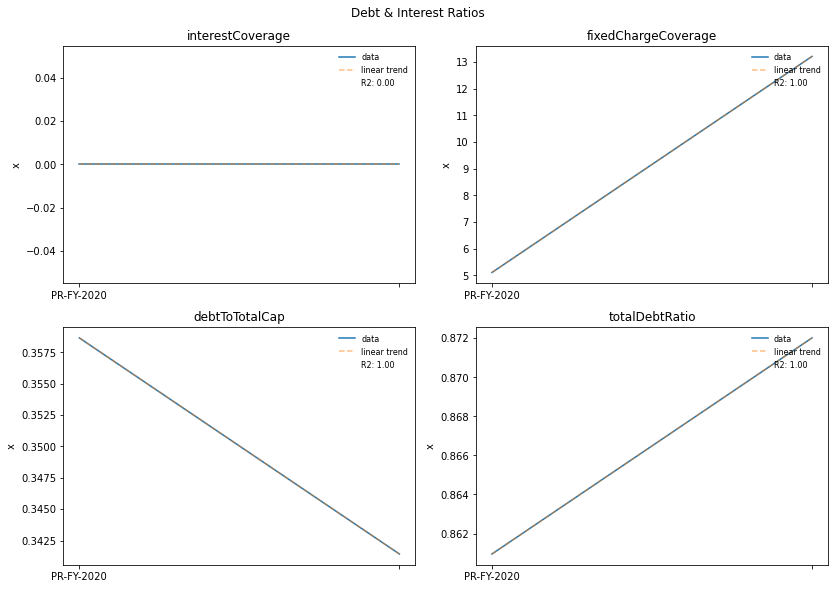

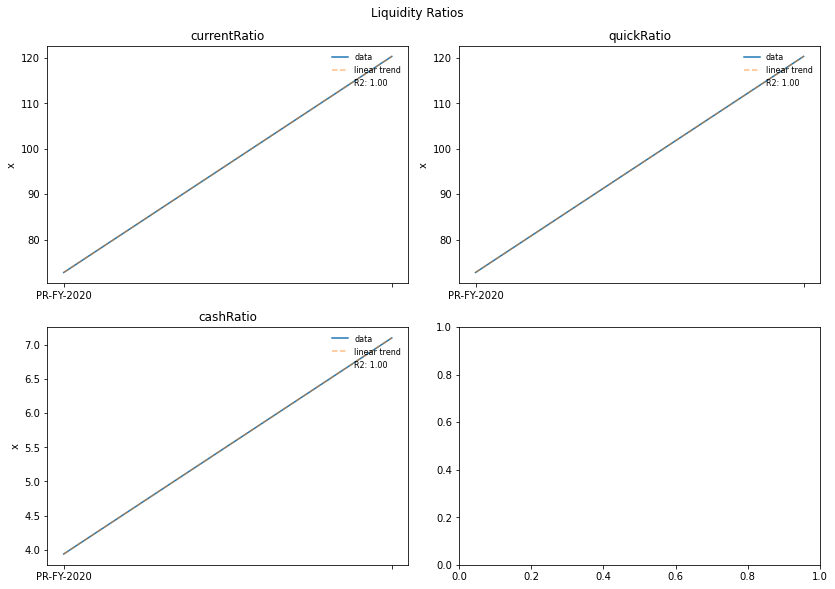

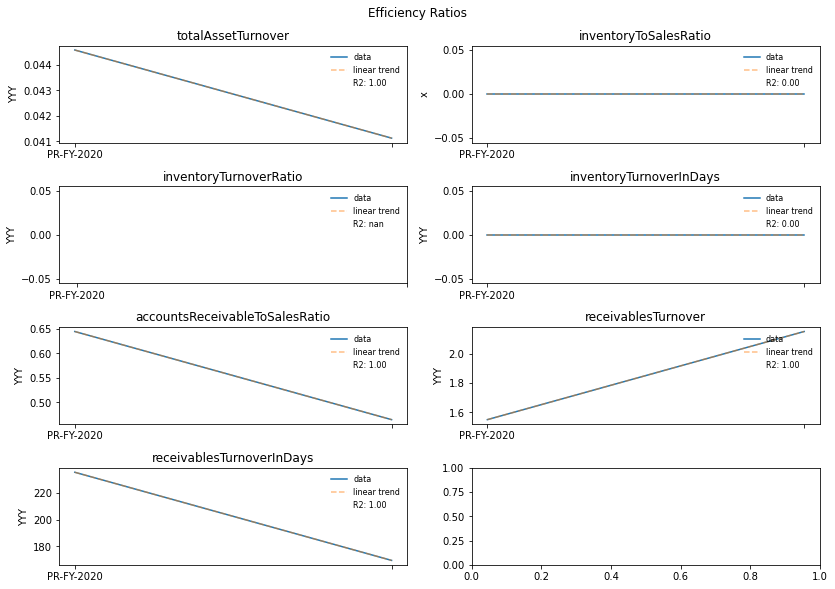

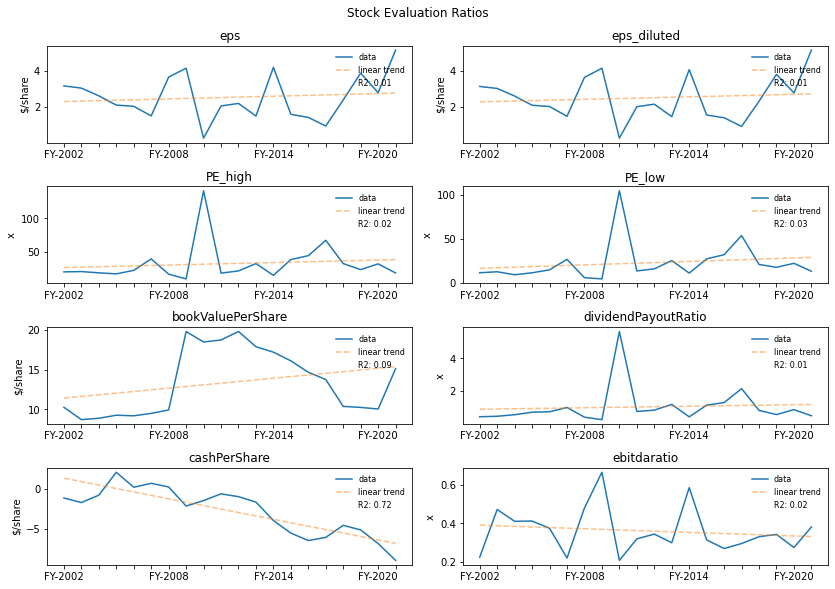

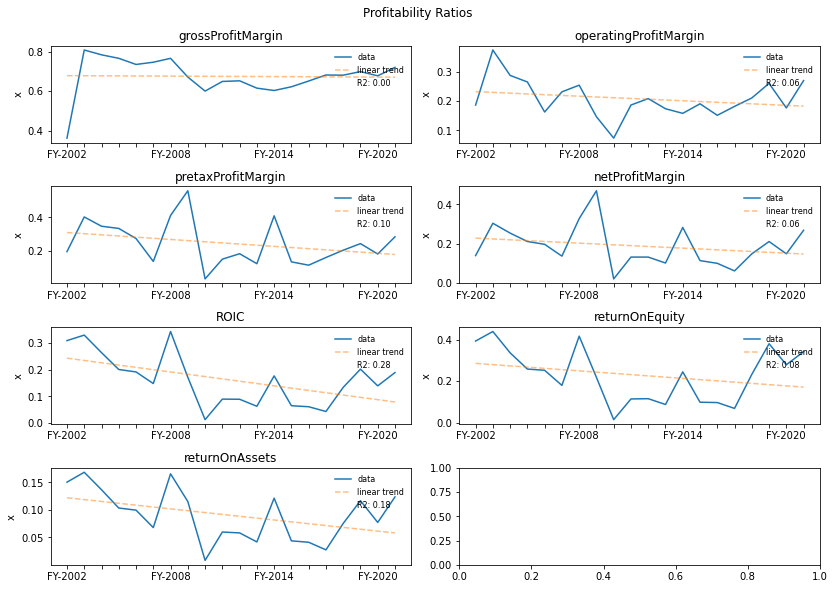

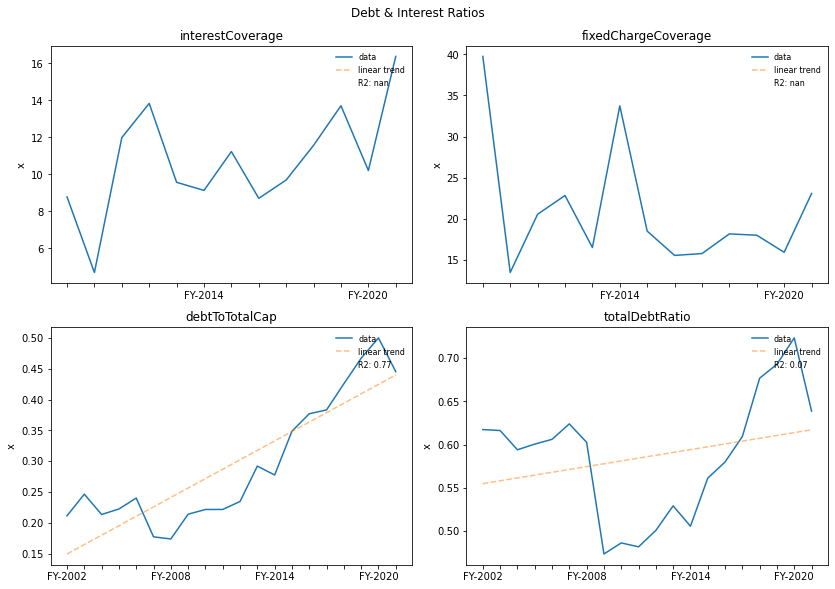

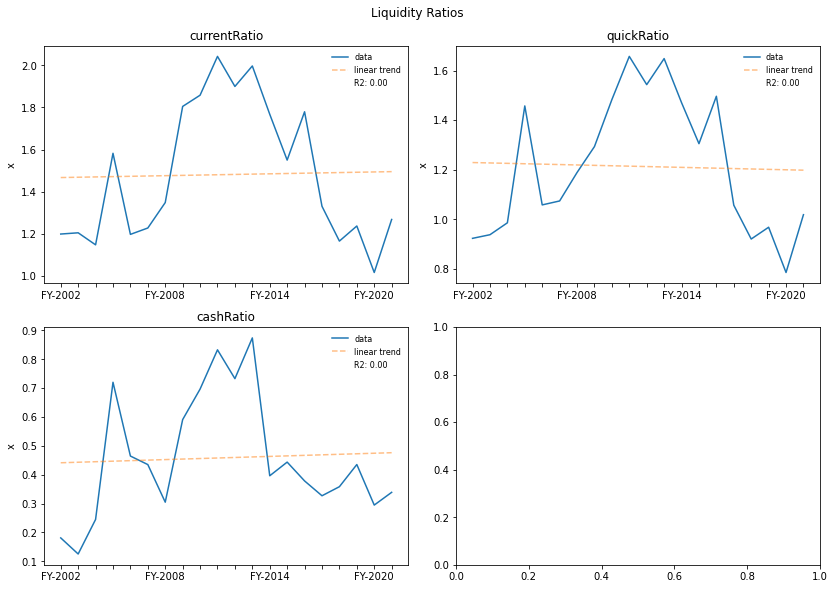

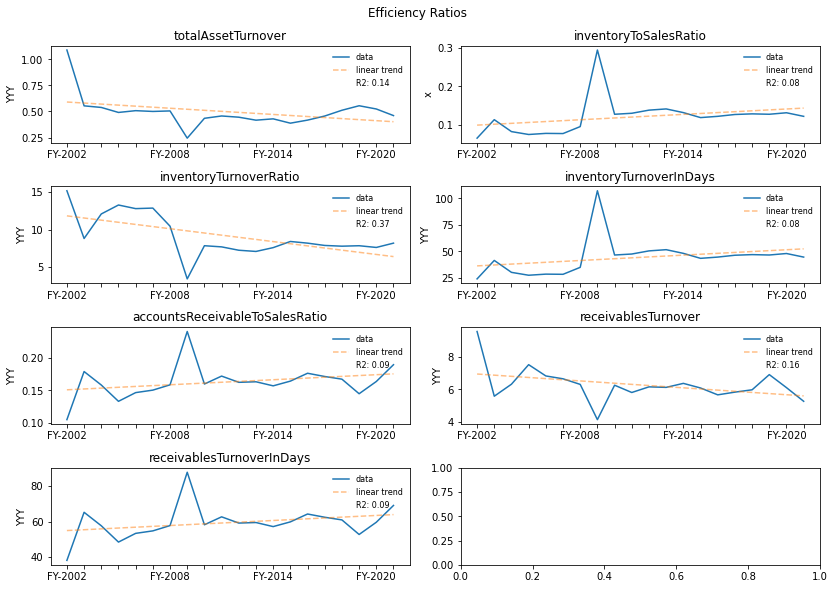

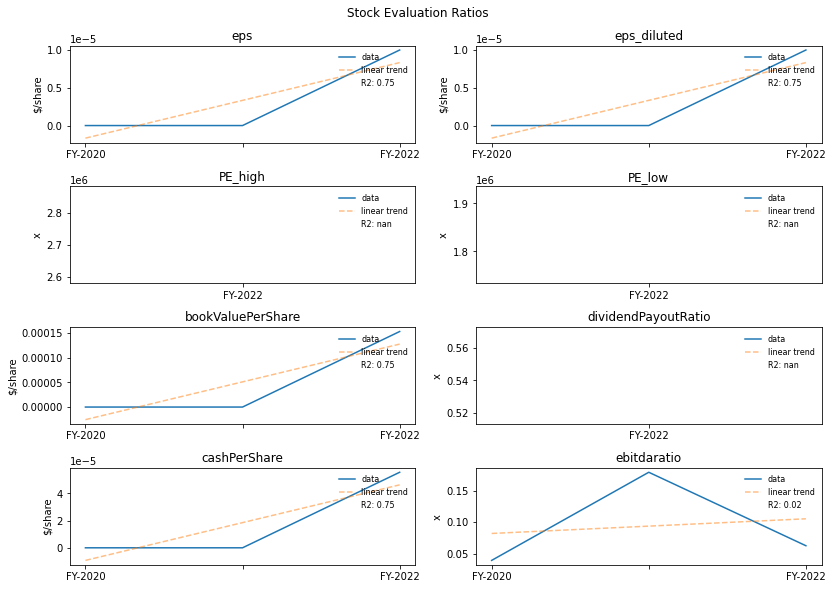

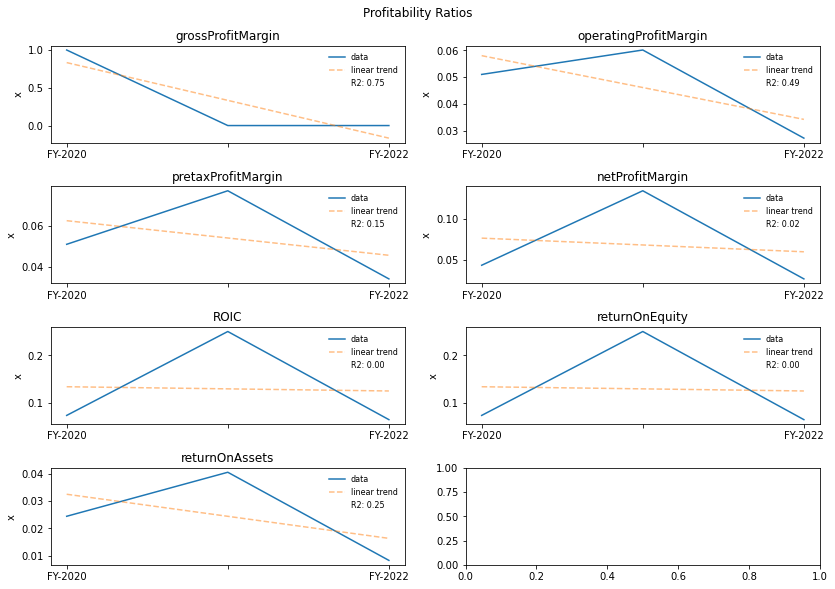

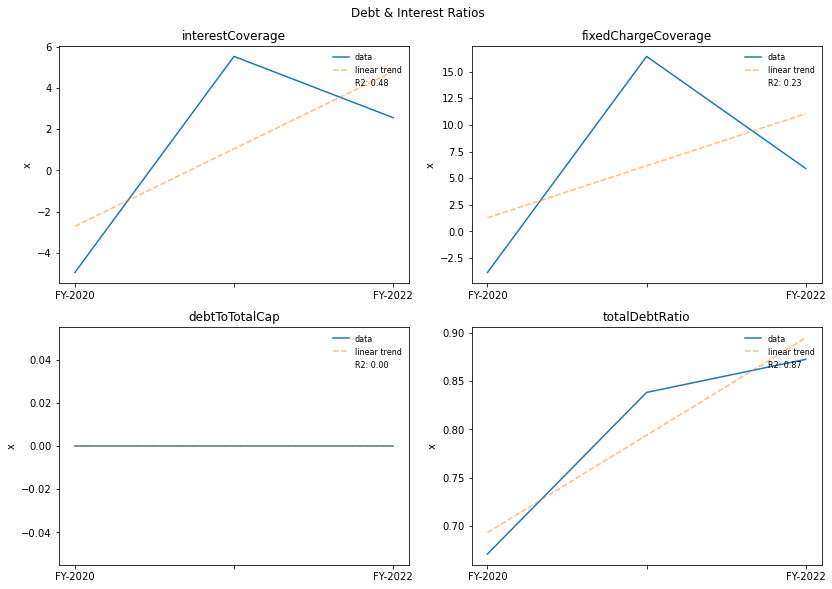

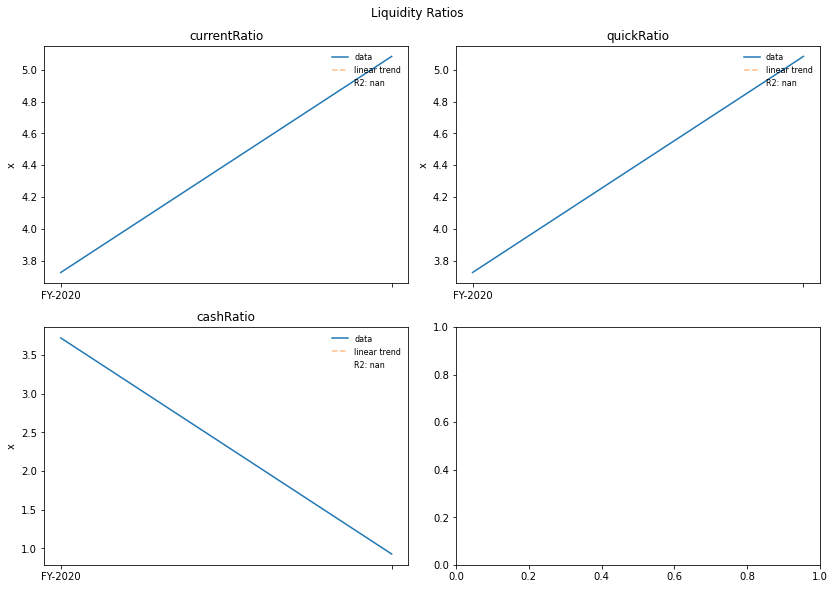

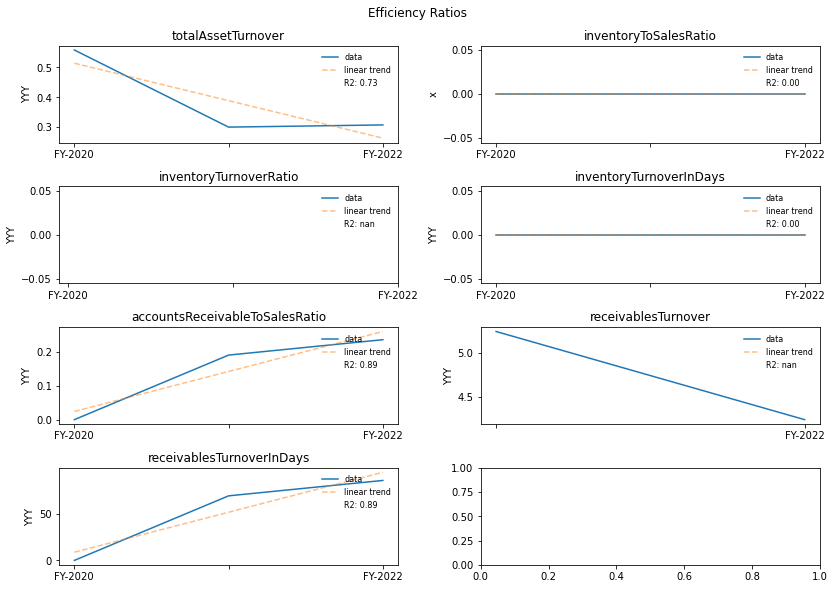

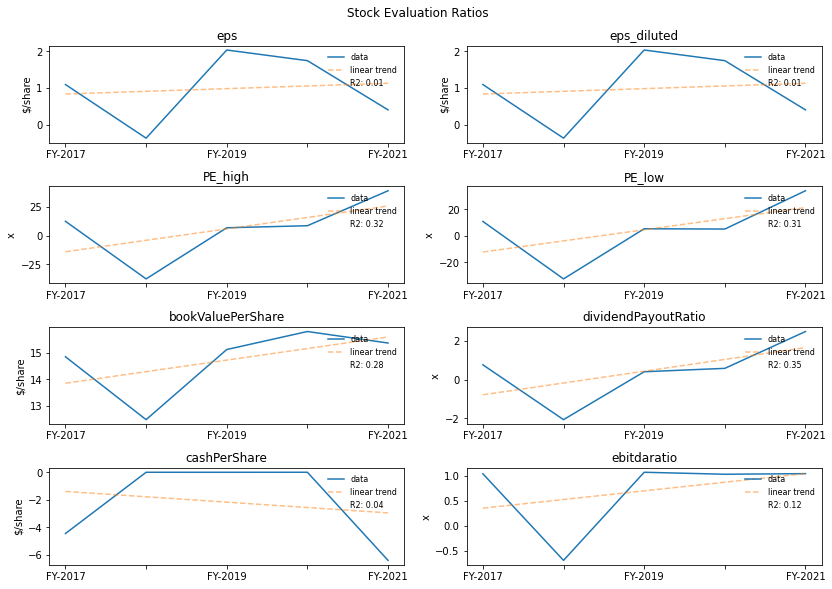

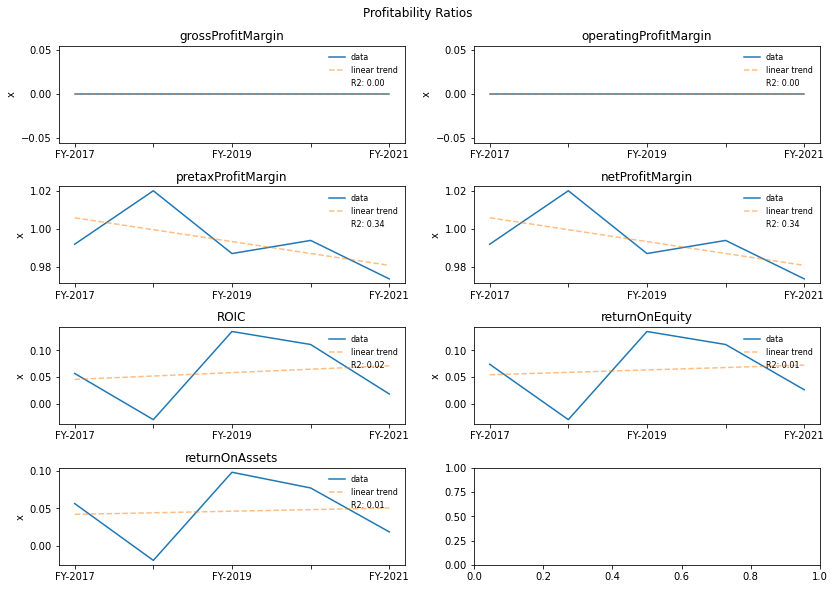

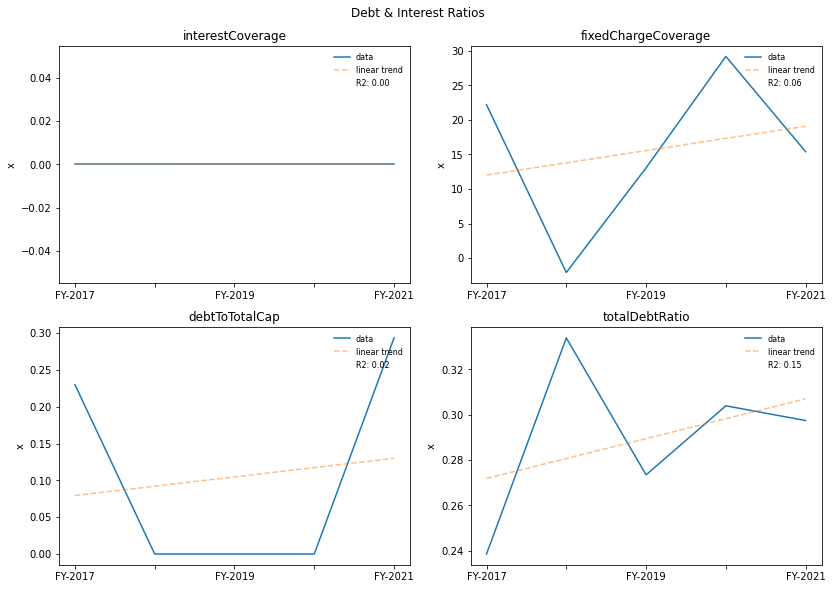

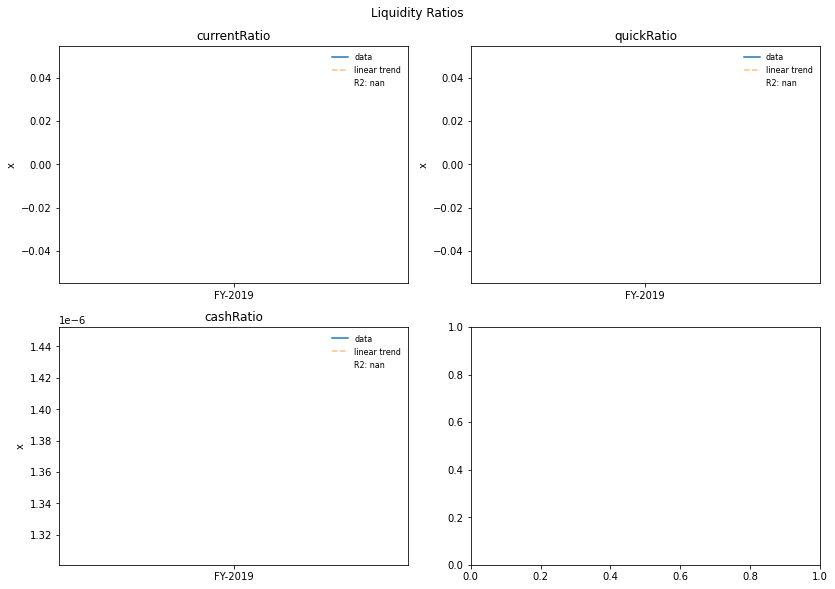

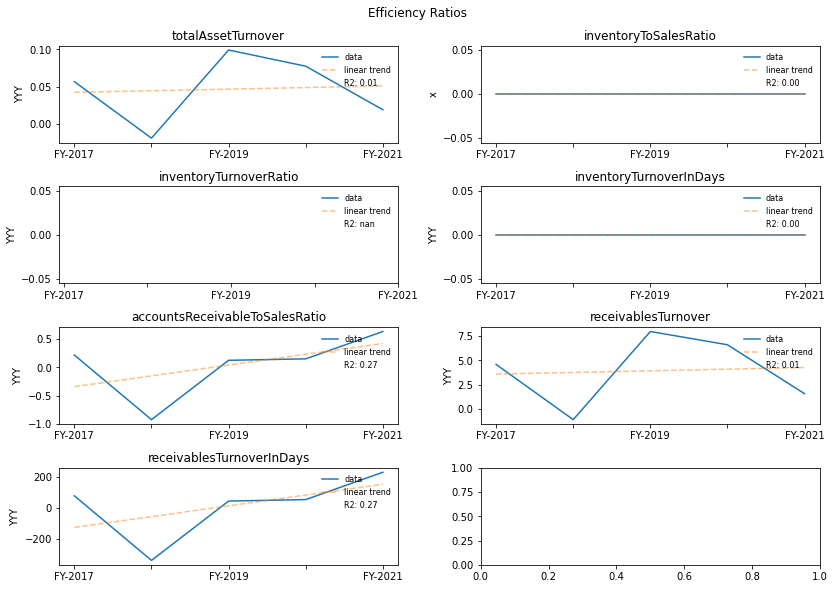

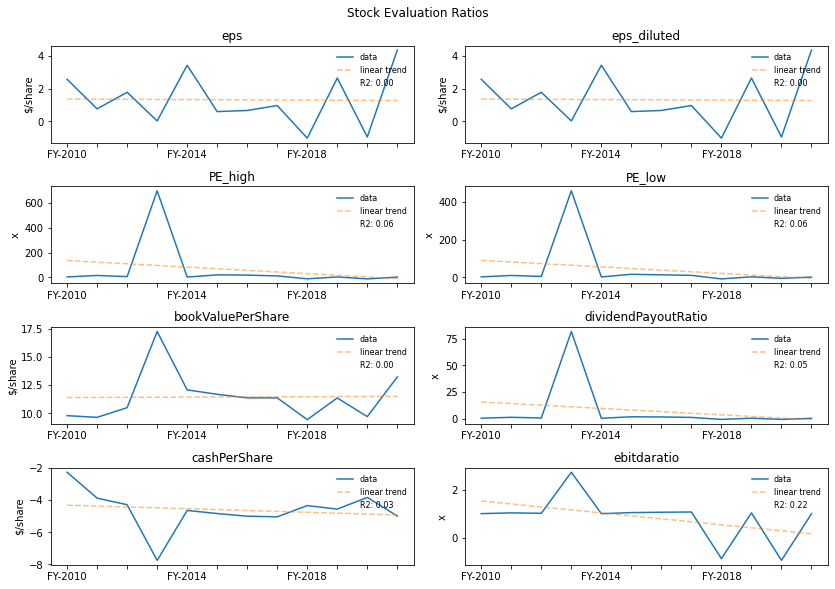

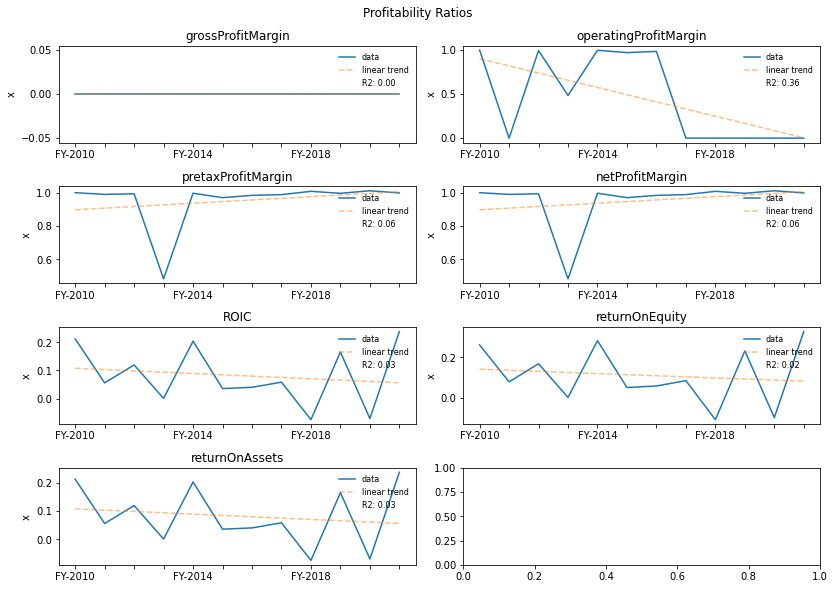

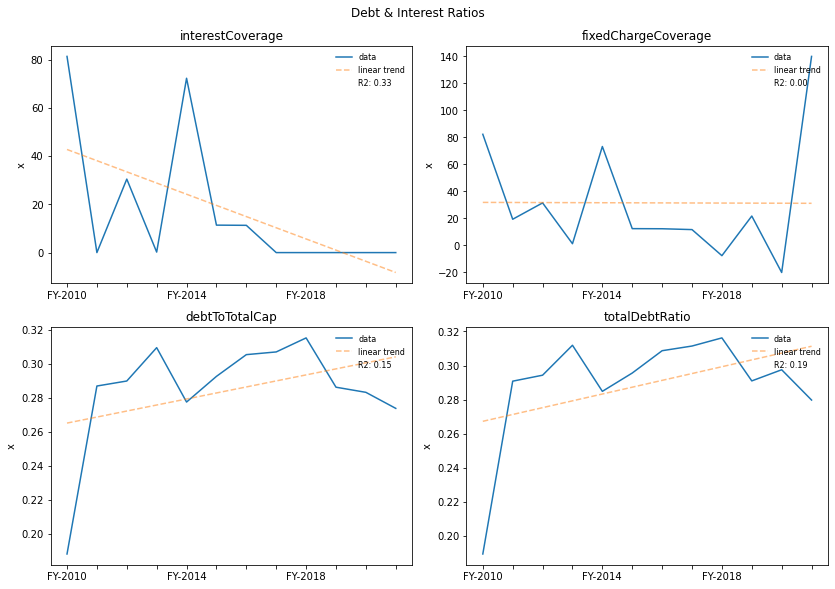

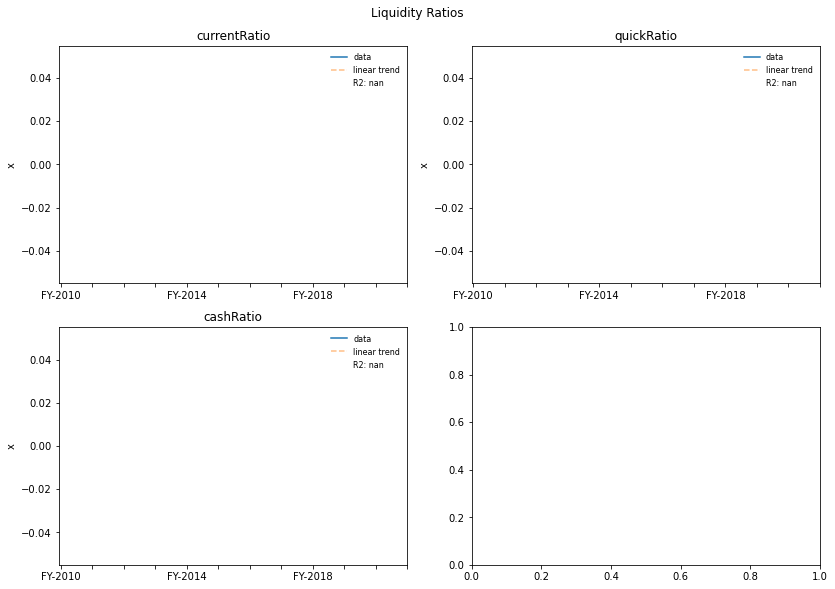

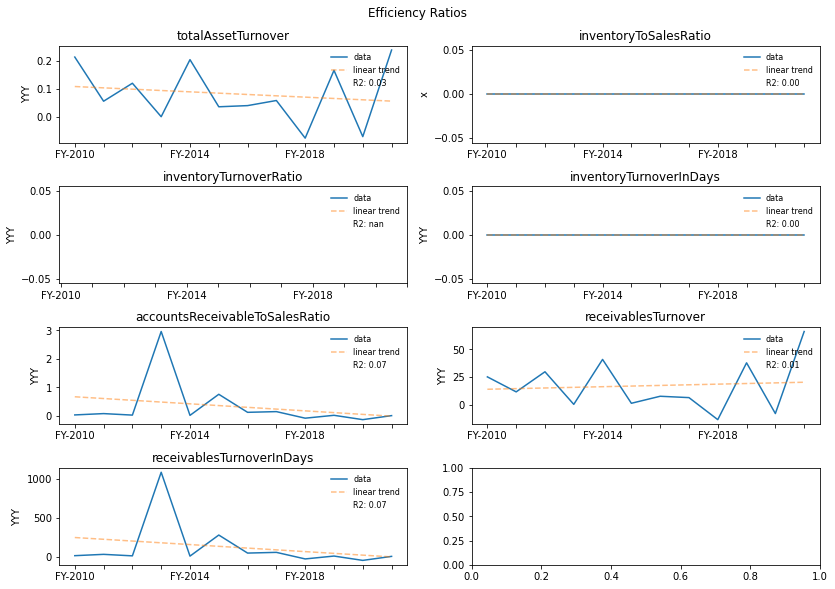

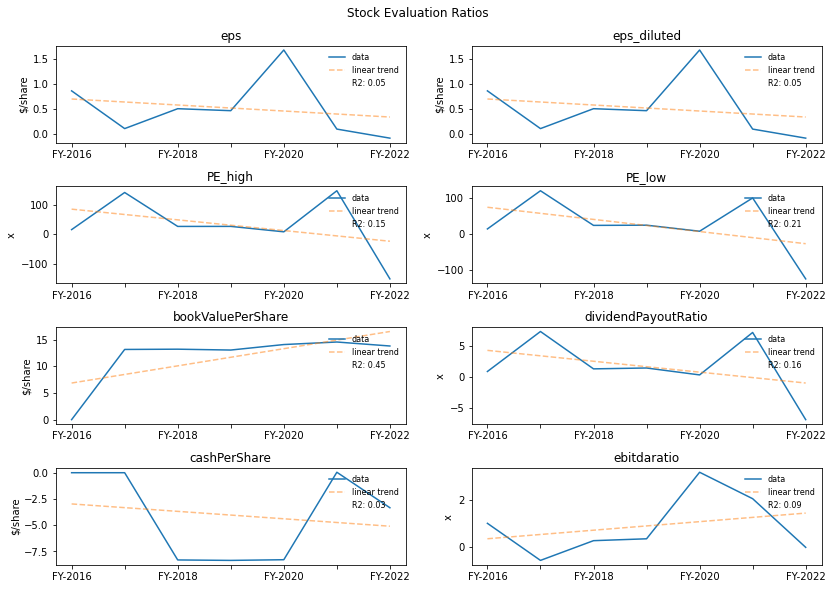

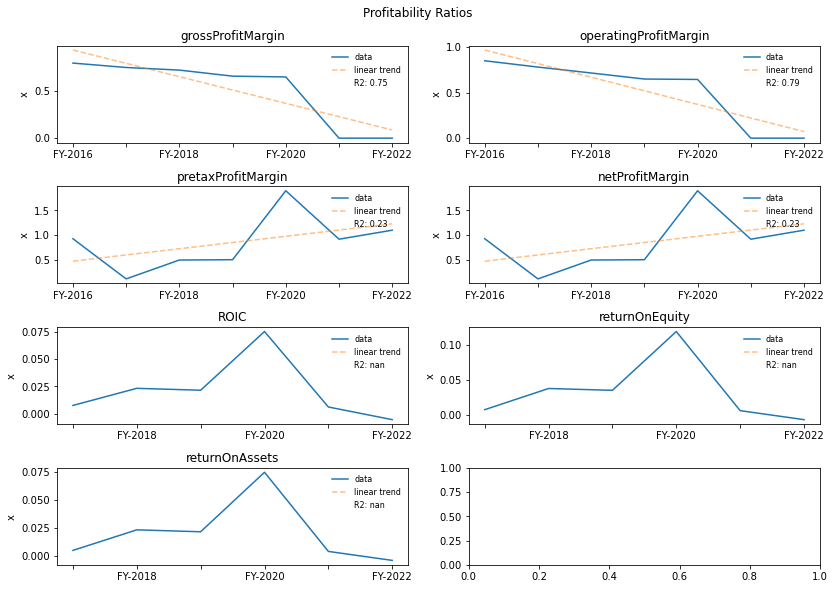

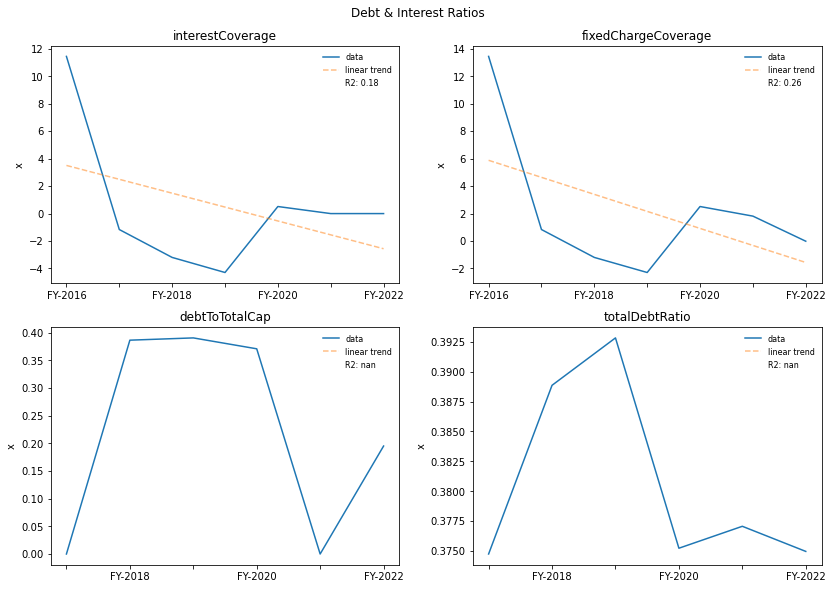

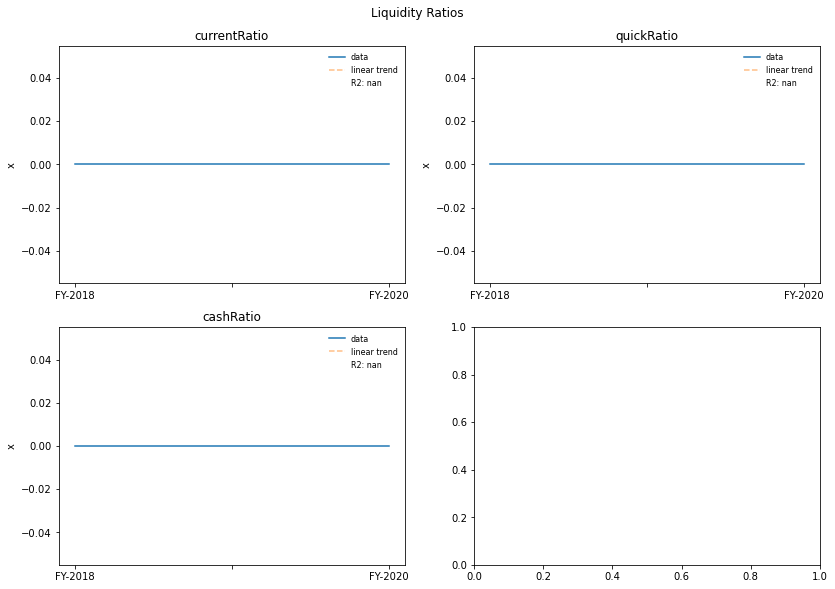

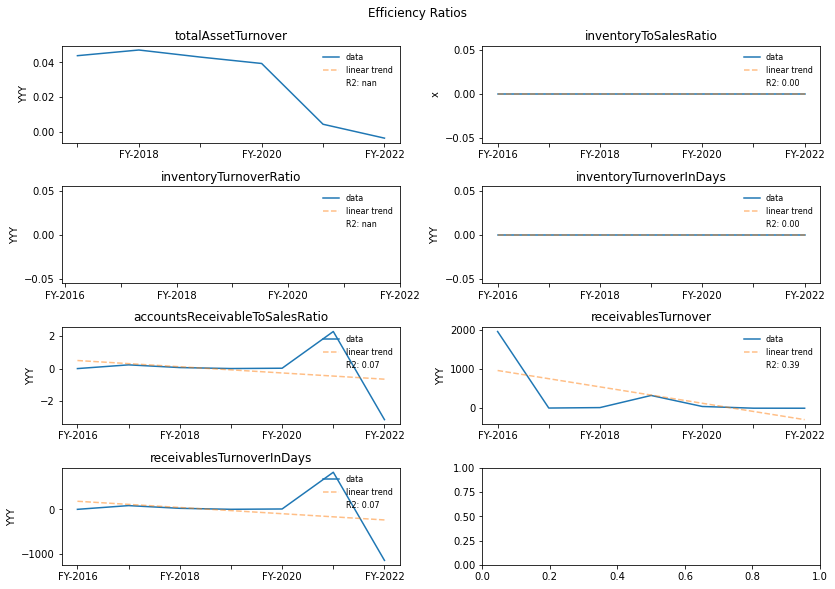

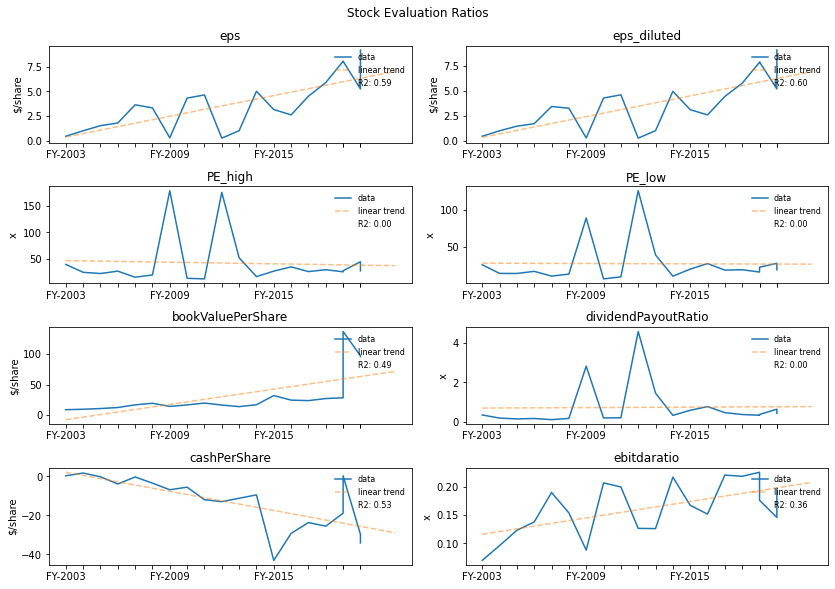

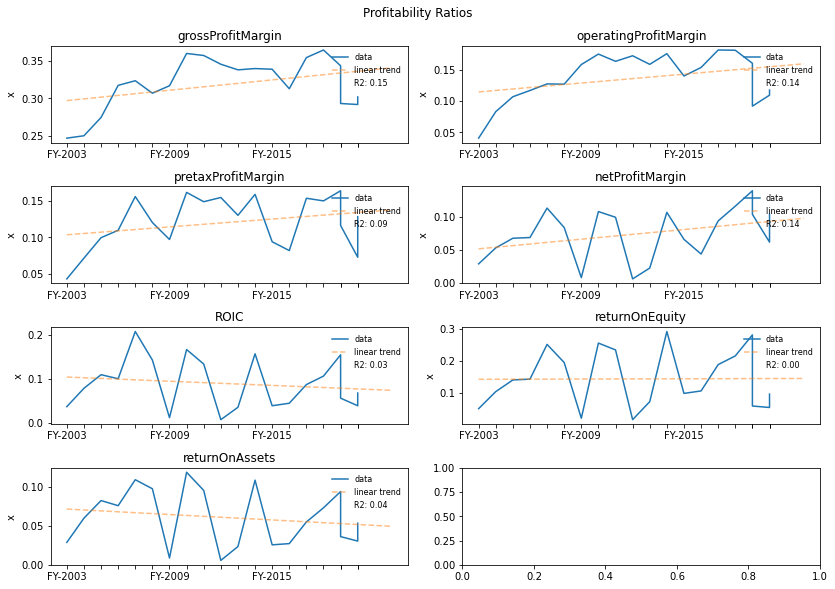

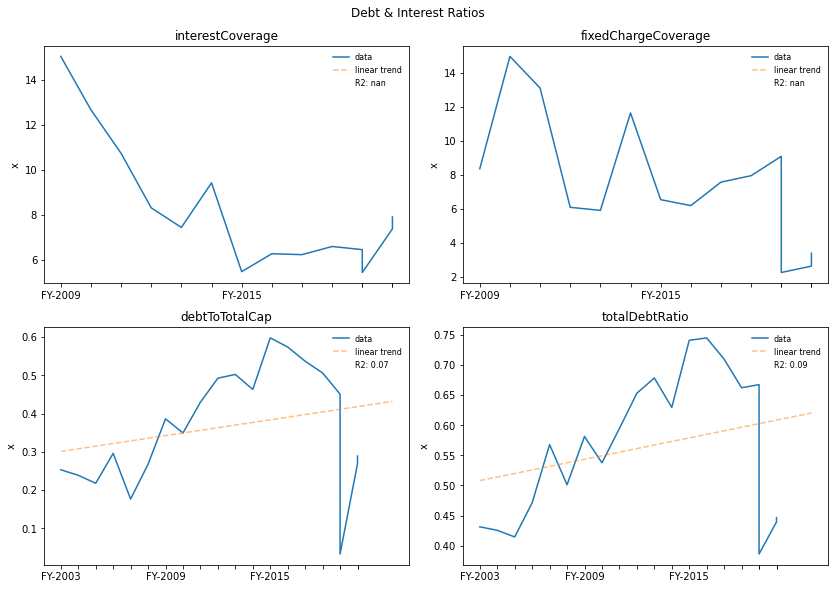

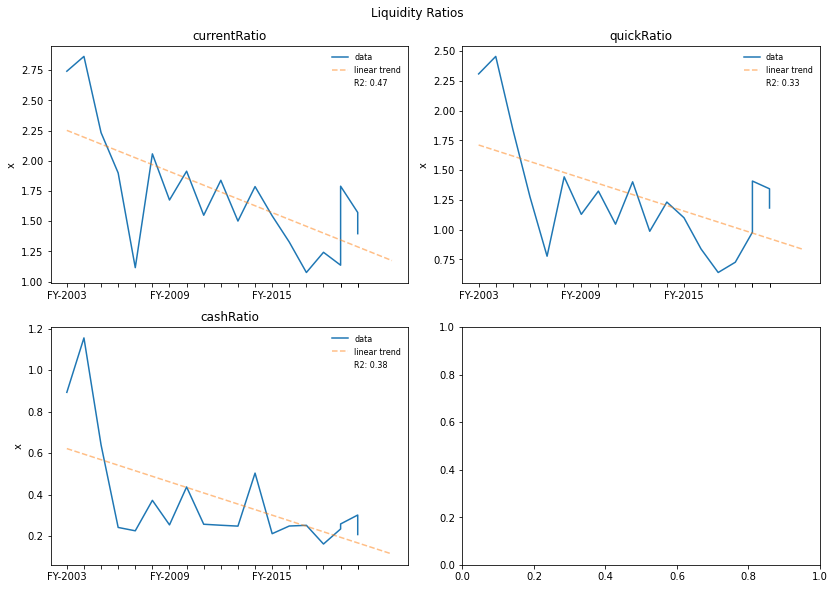

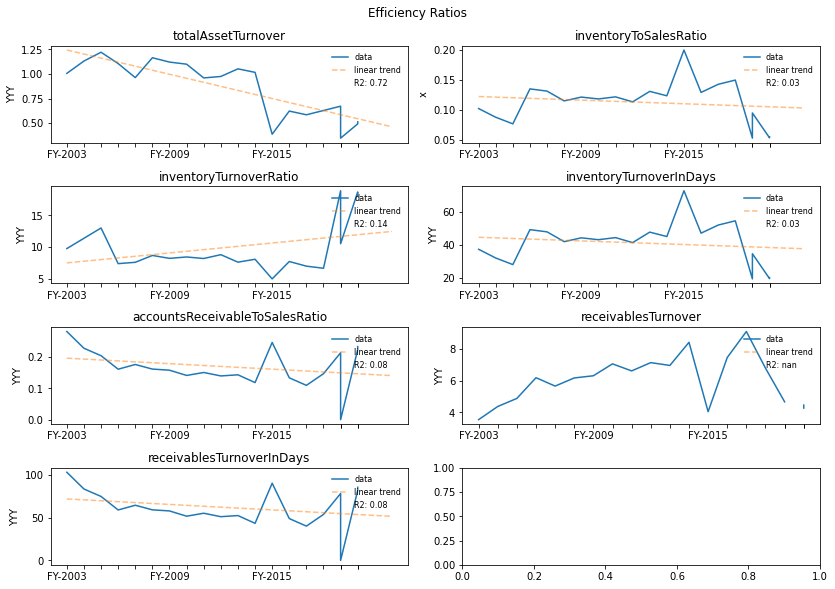

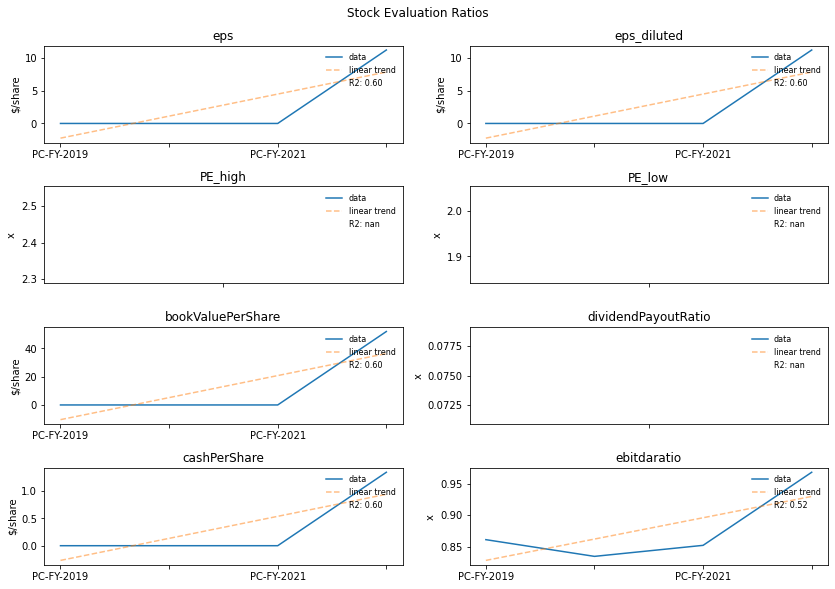

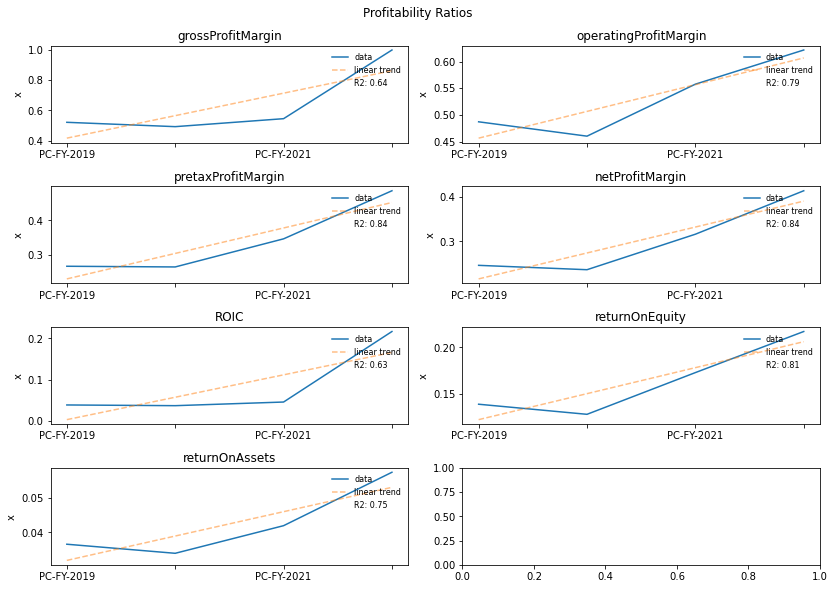

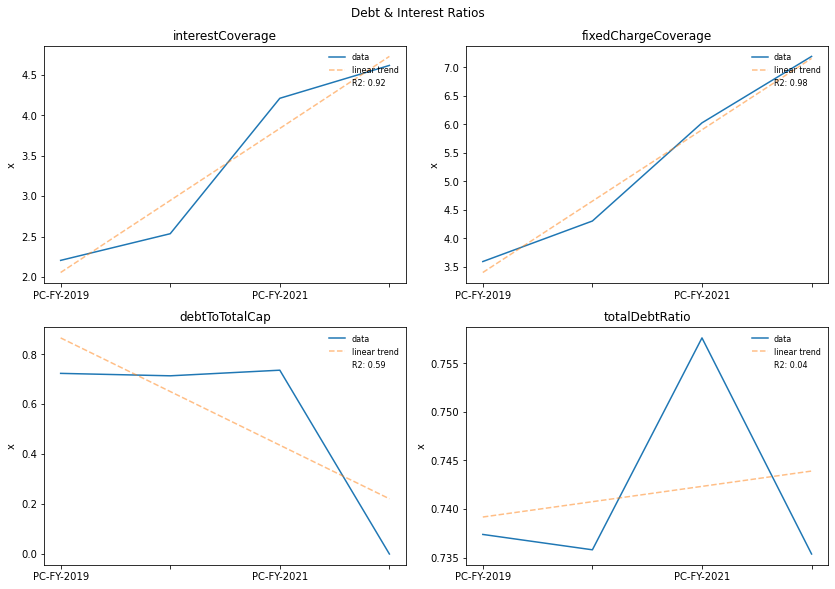

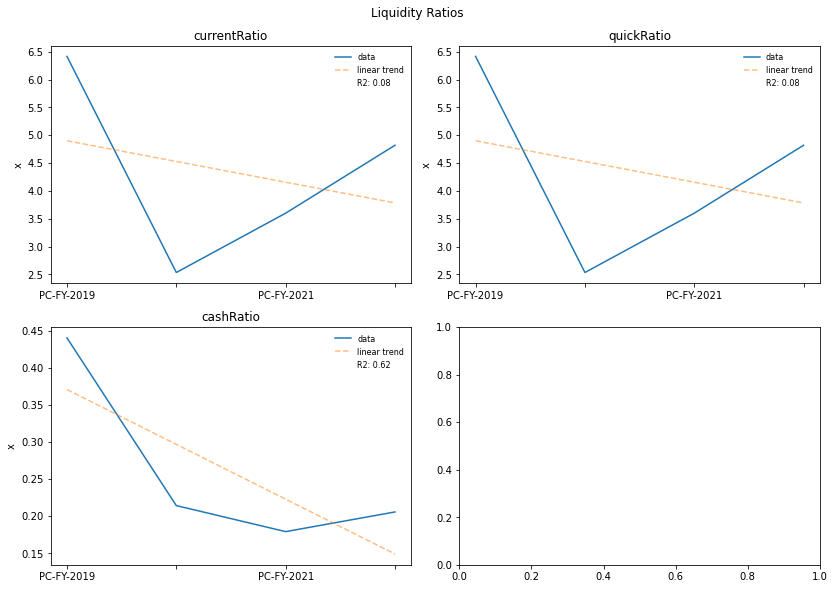

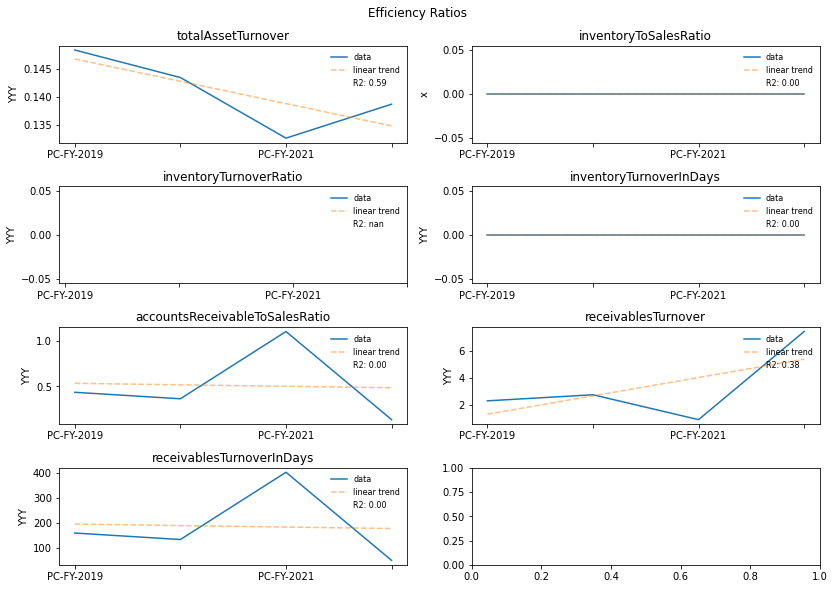

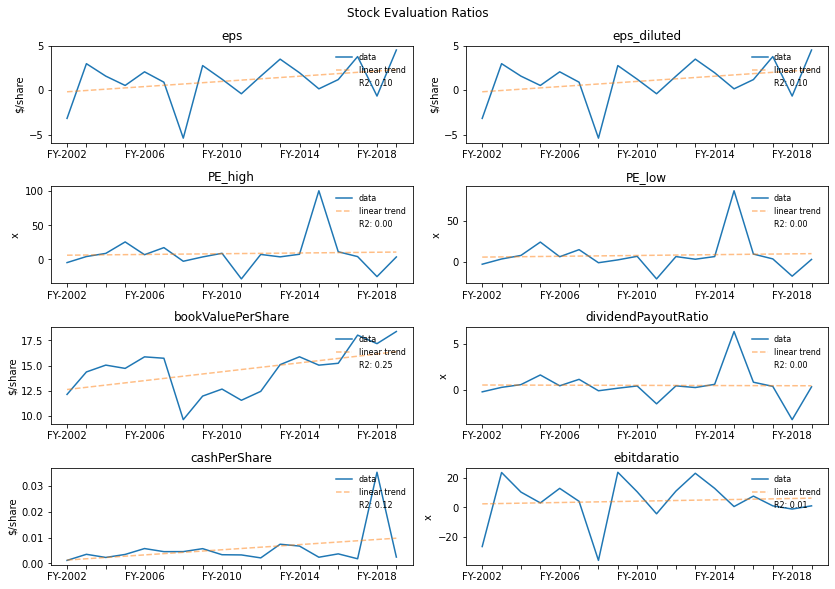

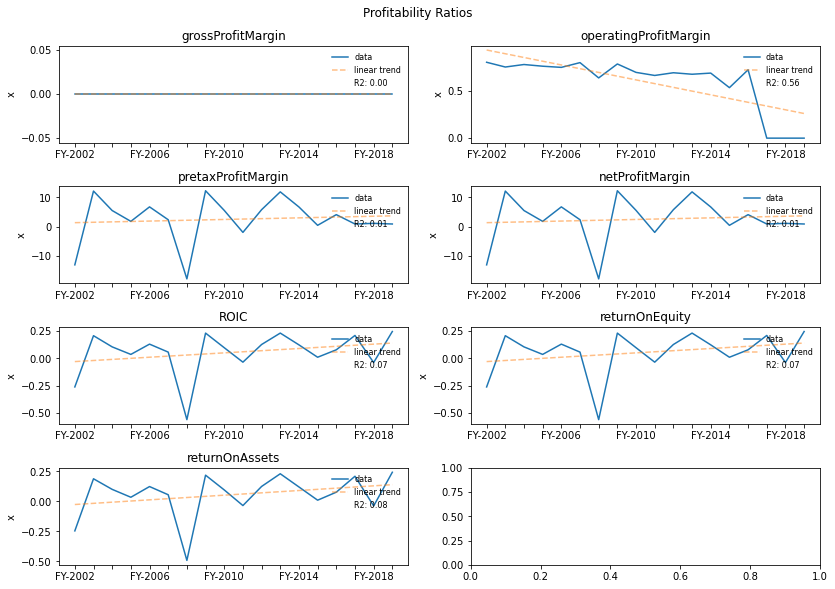

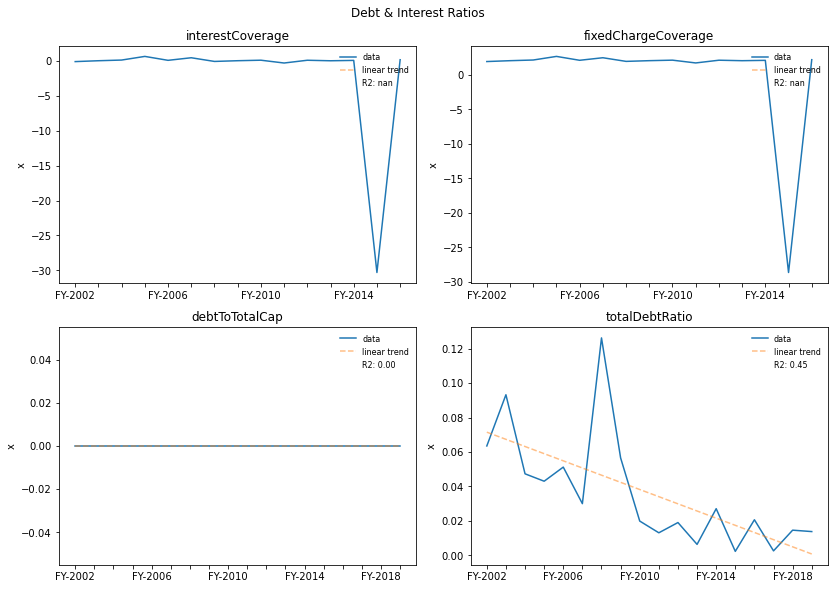

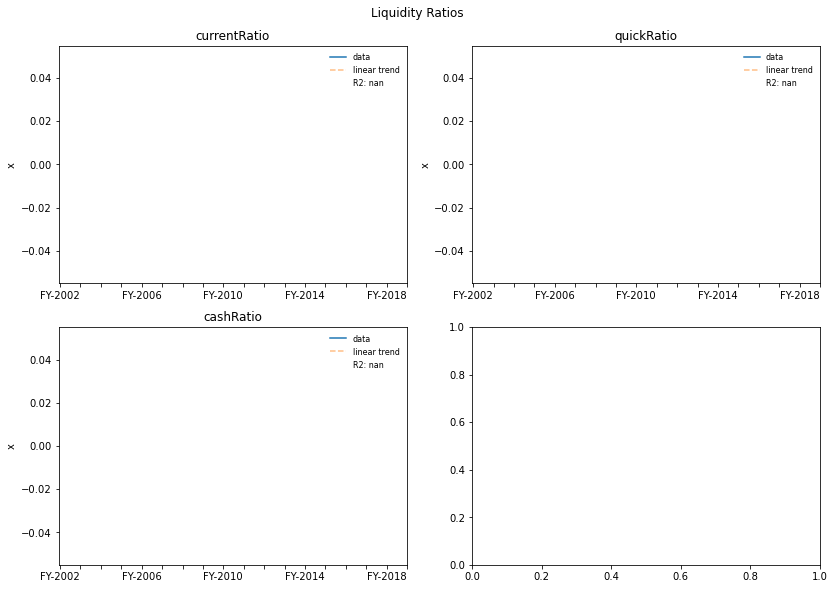

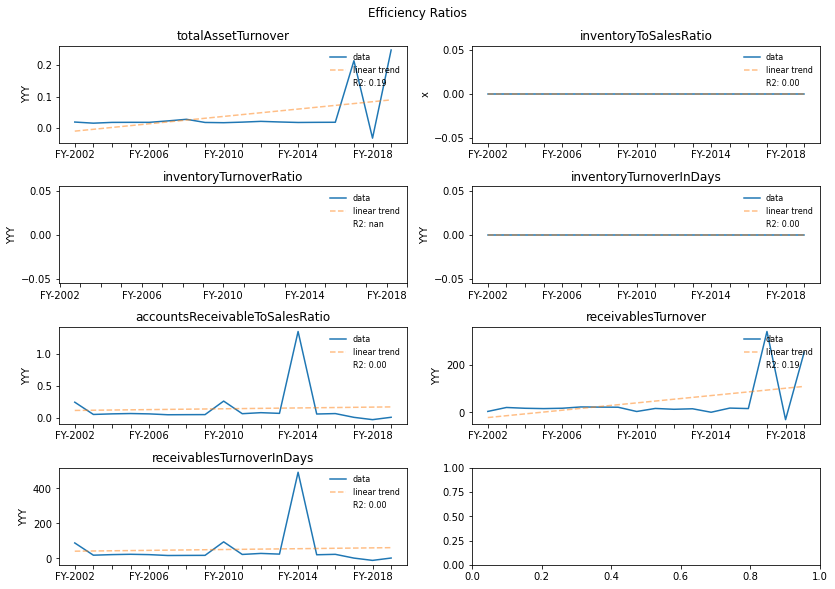

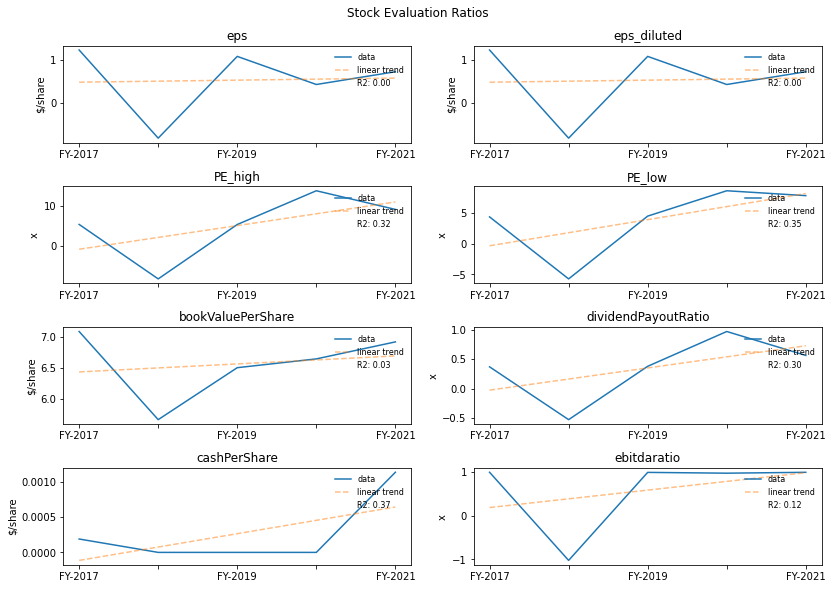

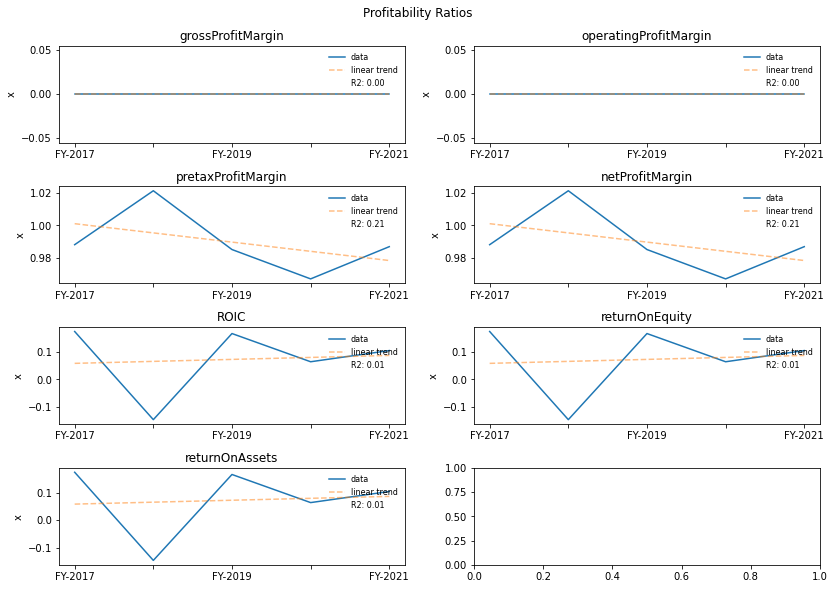

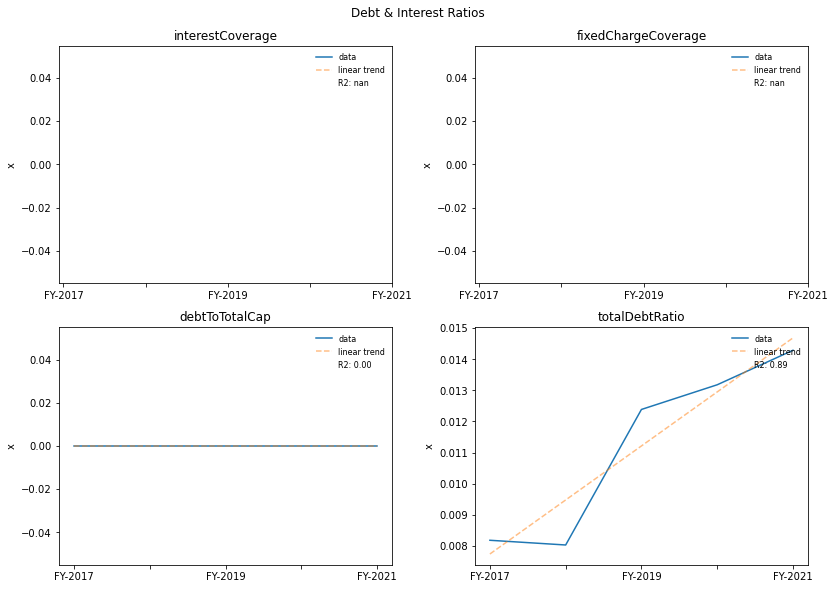

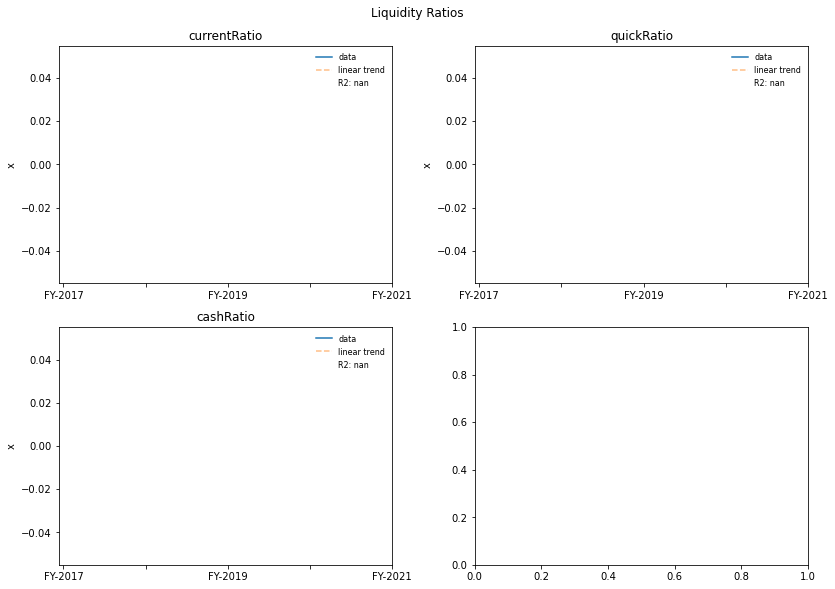

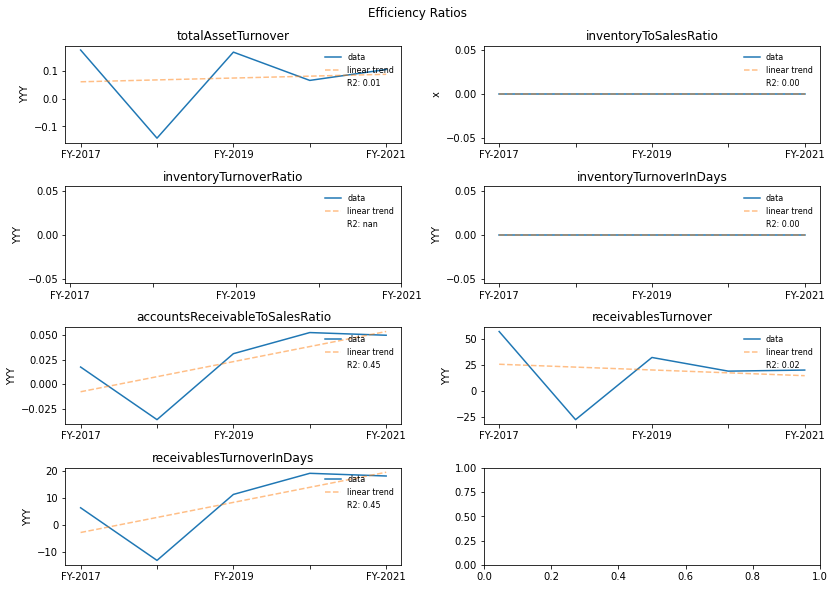

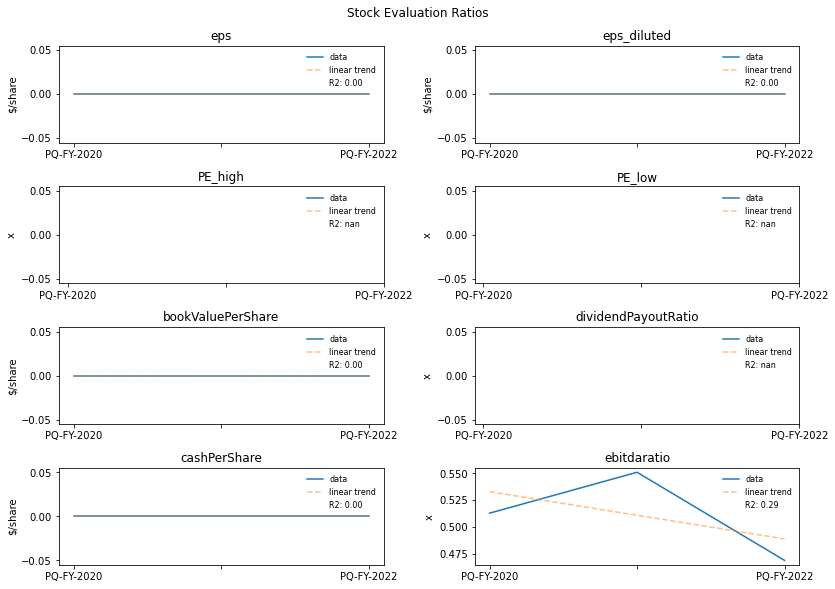

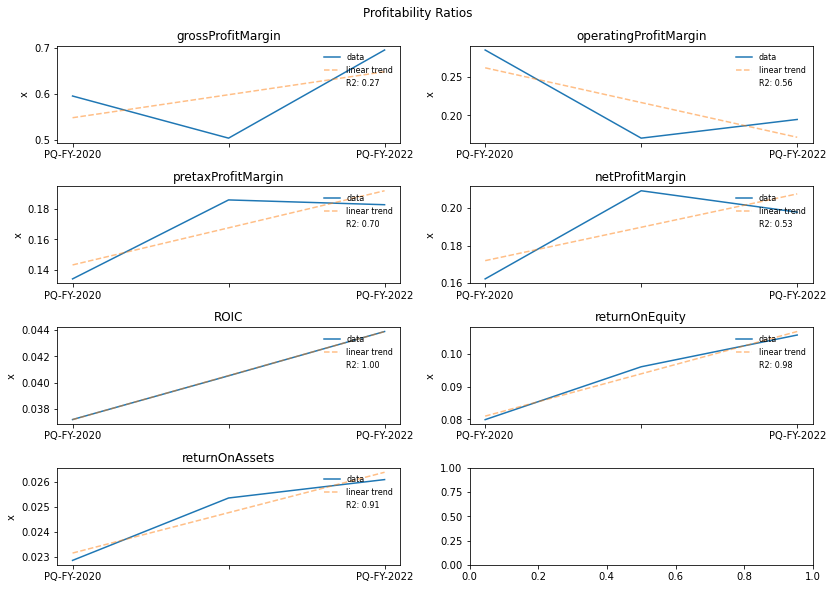

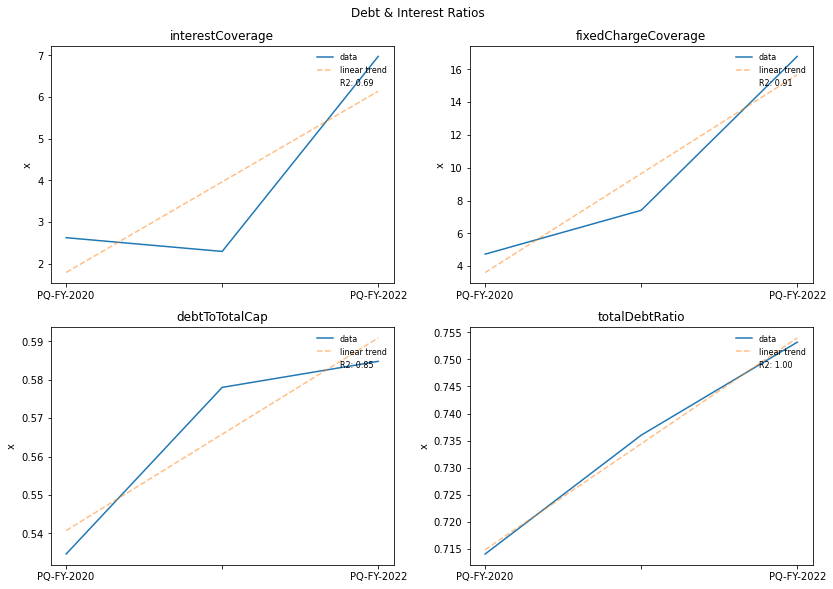

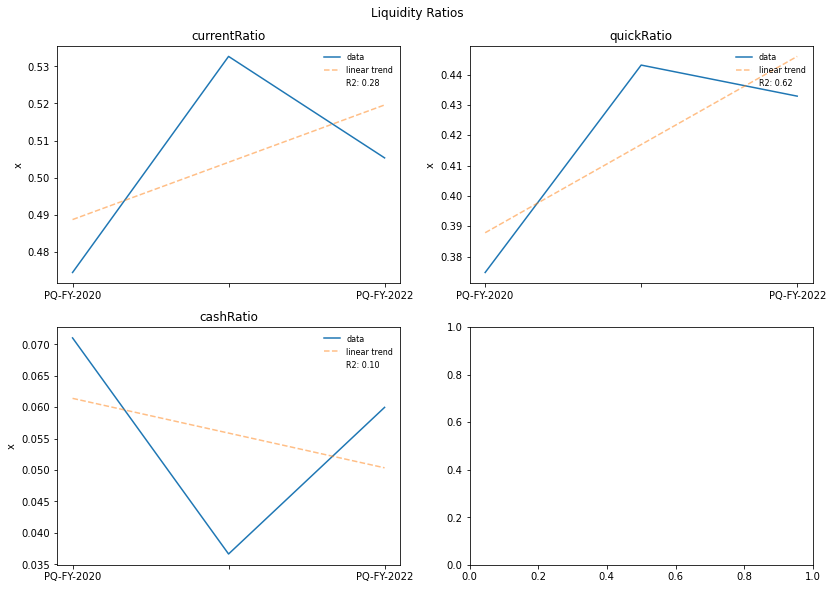

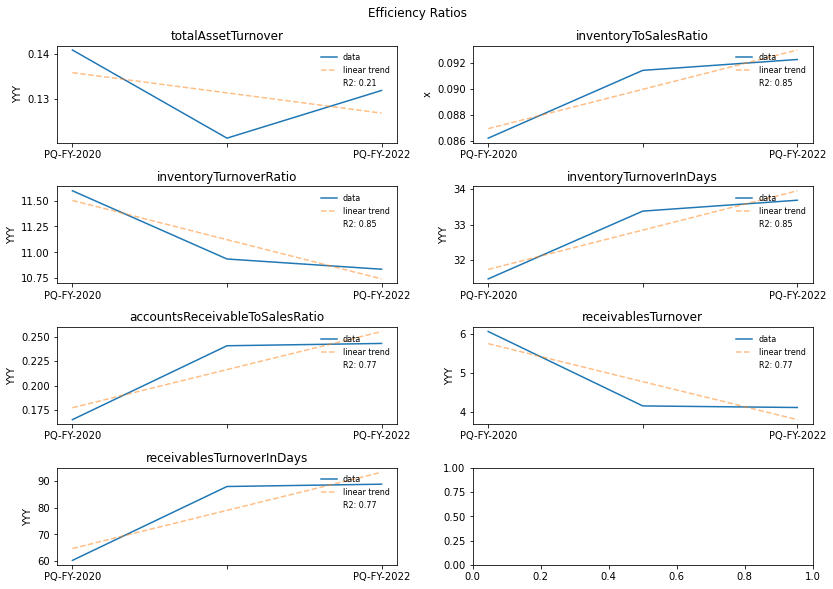

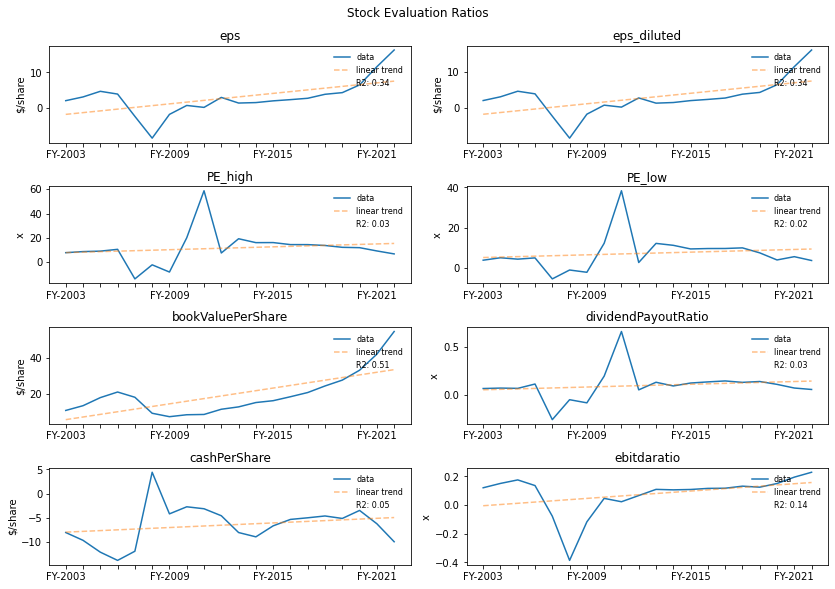

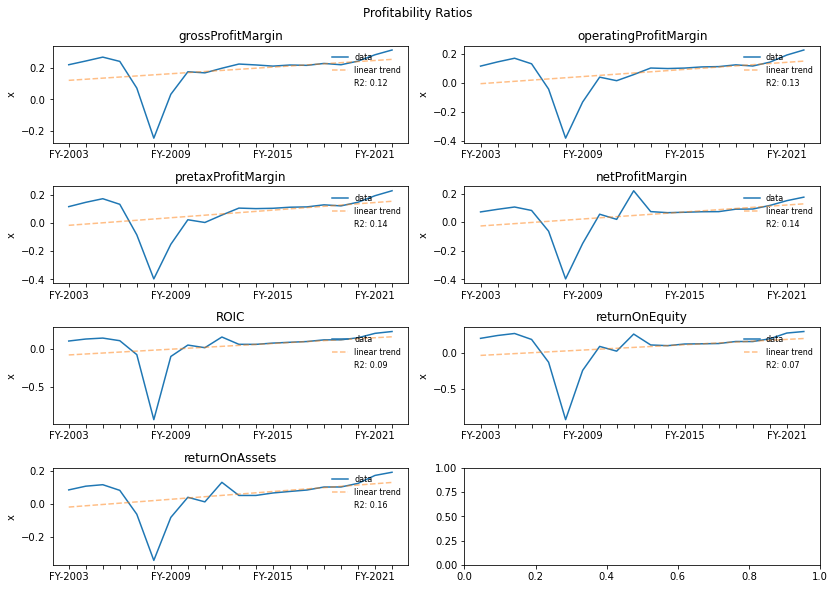

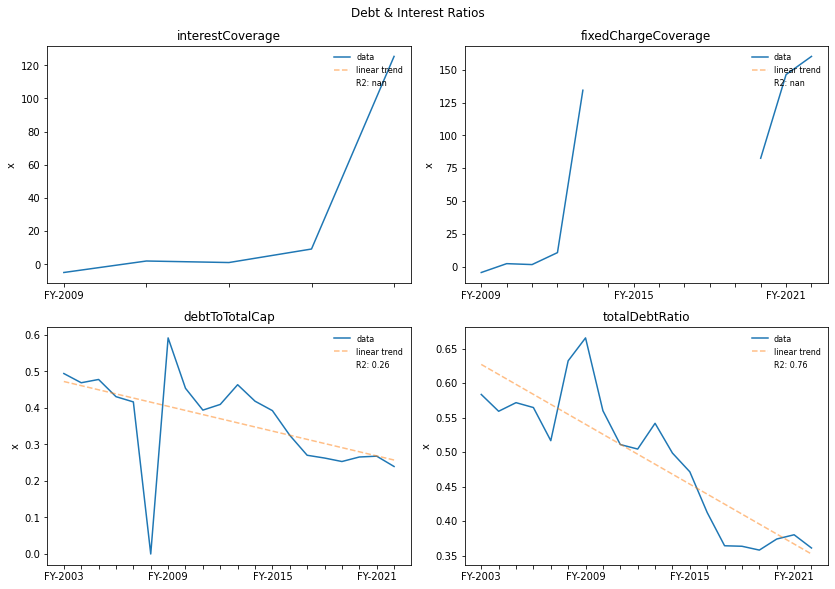

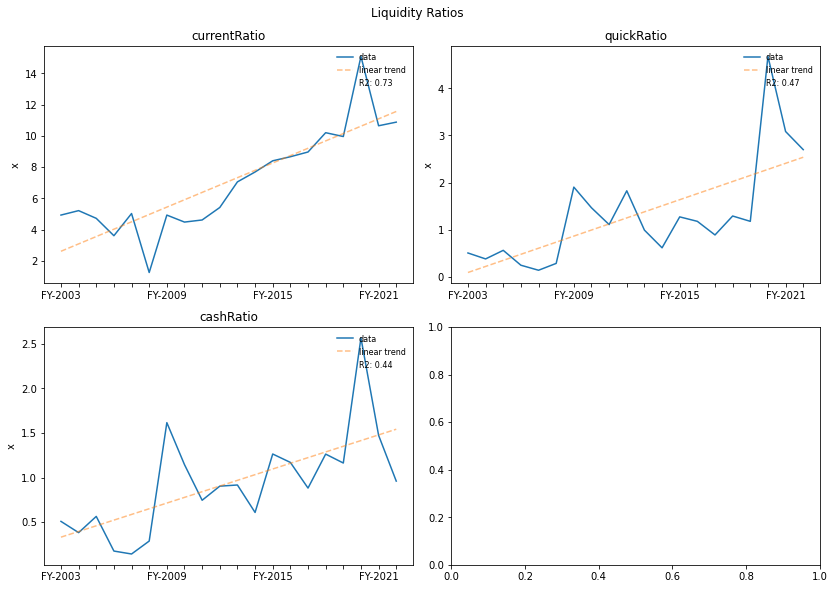

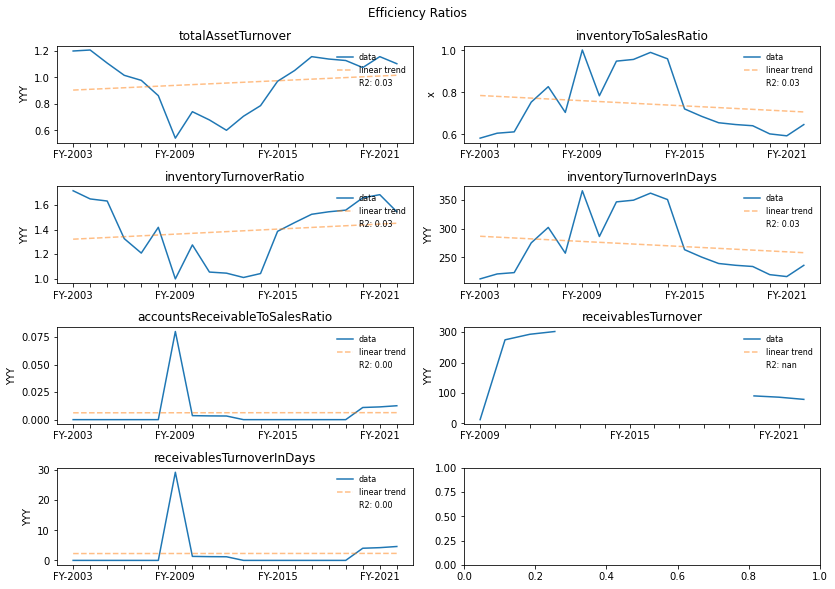

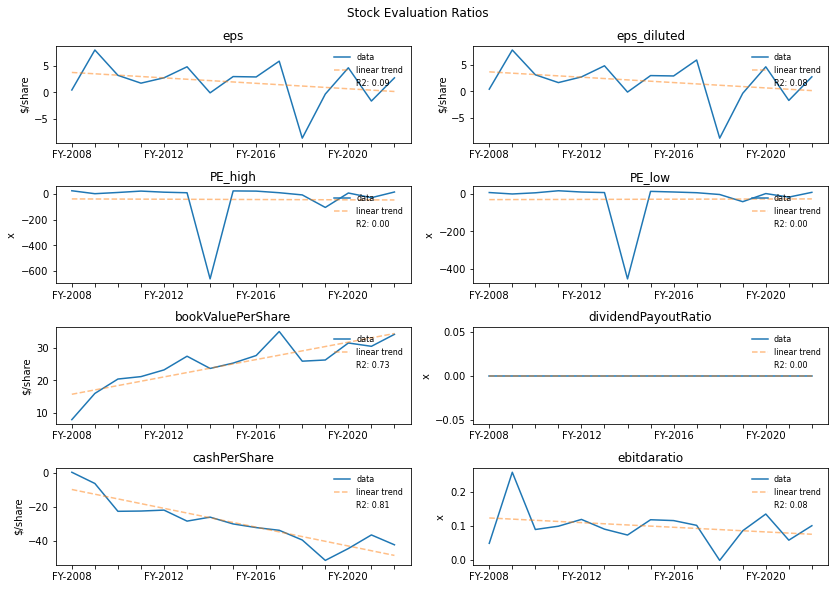

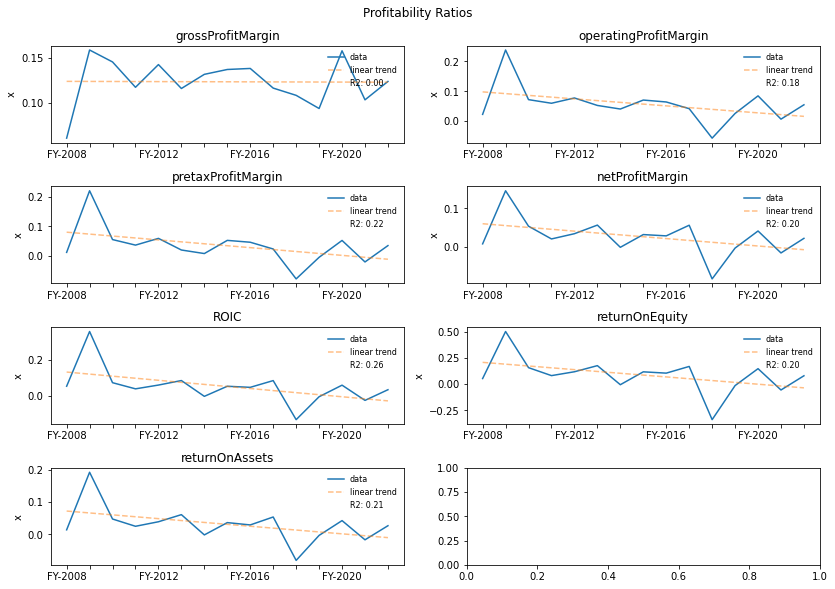

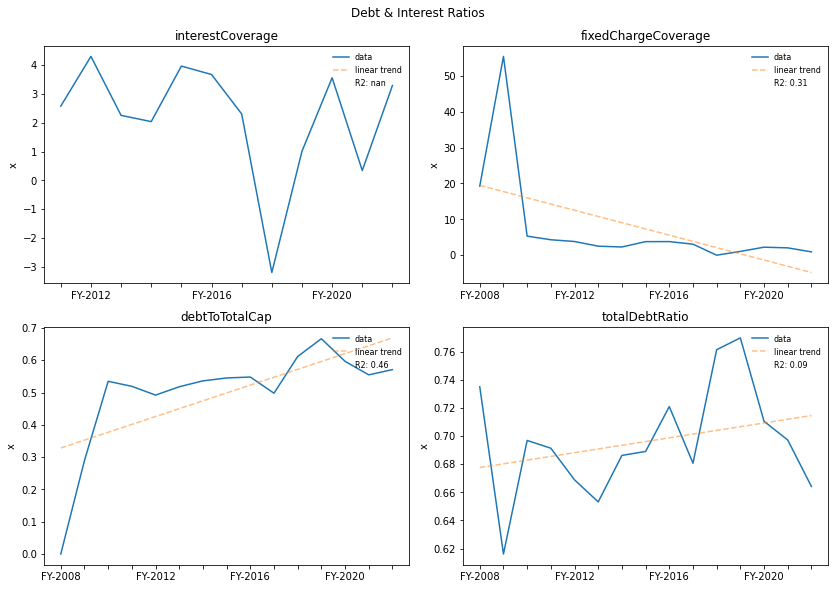

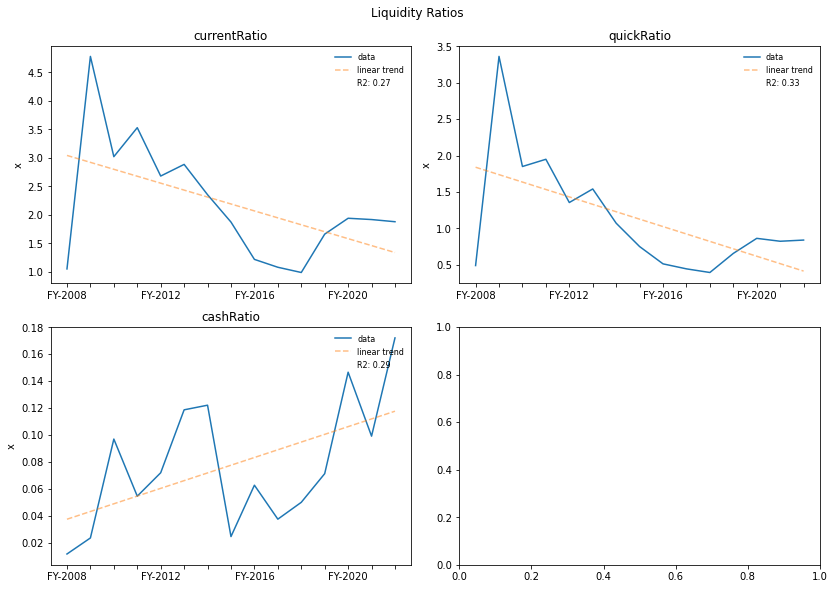

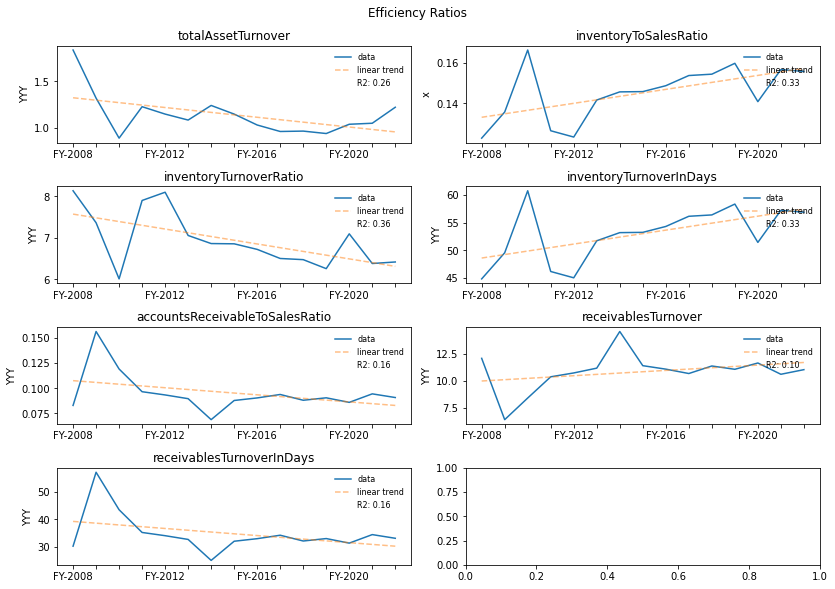

Error in callback <function flush_figures at 0x000002260410E040> (for post_execute):


KeyboardInterrupt: 

In [10]:
for ticker in ticker_scan:
    try:
        clear_output()
        print(f"Ticker {ticker}")
        Company(ticker, api_key)
    except AssertionError:
        pass

        


In [7]:
ticker_scan.index('PERF-WT')

0

In [18]:
company = 'RONI-UN'
period='annual'
limit=20
balance_sheets = requests.get(f'https://financialmodelingprep.com/api/v3/balance-sheet-statement/{company}?period={period}&limit={limit}&apikey={api_key}')

In [19]:
balance_sheets.json()

[{'date': '2021-12-31',
  'symbol': 'RONI-UN',
  'reportedCurrency': 'USD',
  'cik': '0001845437',
  'fillingDate': '2022-03-30',
  'acceptedDate': '2022-03-30 16:00:54',
  'calendarYear': '2021',
  'period': 'FY',
  'cashAndCashEquivalents': 2570409,
  'shortTermInvestments': 0,
  'cashAndShortTermInvestments': 2570409,
  'netReceivables': 7960,
  'inventory': 0,
  'otherCurrentAssets': 746720,
  'totalCurrentAssets': 3325089,
  'propertyPlantEquipmentNet': 0,
  'goodwill': 0,
  'intangibleAssets': 0,
  'goodwillAndIntangibleAssets': 0,
  'longTermInvestments': 0,
  'taxAssets': 0,
  'otherNonCurrentAssets': 345044341,
  'totalNonCurrentAssets': 345044341,
  'otherAssets': 0,
  'totalAssets': 348369430,
  'accountPayables': 143405,
  'shortTermDebt': 0,
  'taxPayables': 0,
  'deferredRevenue': 0,
  'otherCurrentLiabilities': 375918,
  'totalCurrentLiabilities': 519323,
  'longTermDebt': 0,
  'deferredRevenueNonCurrent': 0,
  'deferredTaxLiabilitiesNonCurrent': 0,
  'otherNonCurrentLia

In [17]:
ticker_scan.index('RONI-UN')

2

In [13]:
y = a.metrics['ROIC_growth'].copy().dropna()
x = range(len(y))

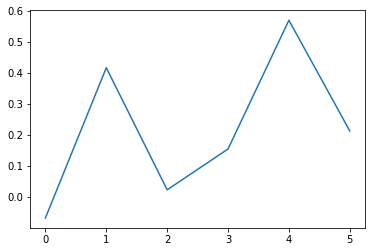

In [14]:
plt.plot(x,y)

In [9]:
from scipy.stats import linregress
xx, yy, r, _, _ = linregress(x, y)

In [10]:
r**2

0.30657525911175687

In [11]:
r

0.5536923867200604

In [4]:
import datetime

In [3]:
a = pd.DataFrame(index = [1,2,3])

In [4]:
hash(a.index)

TypeError: unhashable type: 'Int64Index'

In [ ]:
https://financialmodelingprep.com/api/v3/balance-sheet-statement/AAPL?period=quarter&limit=400&apikey=85d4c0eecd5700626cc5dc37dda9125c